# **1. Latar Belakang**

_____

Perusahaan di bidang jasa Taxi di New York ingin merekrut tenaga lepas (freelance) merupakan seorang Data Science, untuk mengetahui perjalanan taxi yang ada di new york, tipe perjalanan orang yang sering menggunakan taxi di New York,  dan orang-orang naik taxi di new york ada berapa orang dalam sehari.

# **2. Permasalahan yang terjadi**

___

perusaahaan taxi memiliki permasalahan yang terjadi yaitu **perusahaan ingin mengetahui total jumlah pendapatan, jumlah penumpang dari perjalanan taxi dan tipe perjalanan seperti apa disukai penumpang di New york**

# **3. Data**

___

permasalahan yang terjadi freelance(tenaga kerja lepas), menganalisa data yang sudah ada dalam bentuk CSV yaitu 'NYC TLC Trip Record.csv'

In [1]:
import numpy as np
import pandas as pd

berikut ini adalah keterangan dari data set: 
- VendorID suatu Kode yang menunjukkan provider yang menyediakan data/rekaman perjalanan
  - 1 = Creative Mobile Technologies, LLC.
  - 2 = VeriFone Inc.
- lpep_pickup_datetime : Tanggal dan waktu saat meter diaktifkan.
- lpep_dropoff_datetime : Tanggal dan waktu saat meter non aktifkan.
- RateCodeID Kode tarif akhir berlaku di akhir perjalanan.
  - 1 = Tarif standar
  - 2 = JFK
  - 3 = Newark
  - 4 = Nassau or Westchester
  - 5 = Negotiated
  - 6 = Negotiated fare
- Store_and_fwd_flag Bendera ini menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor, alias "simpan dan teruskan", karena kendaraan itu melakukannya tidak memiliki koneksi ke server.
  - Y = store and forward trip 
  - N = not a store and forward trip
- Passenger_count : Jumlah penumpang di dalam kendaraan(tidak termasuk pengemudi). nilai ini dimasukkan oleh pengemudi.
- Trip_distance : Jarak perjalanan yang telah berlalu dalam mil dilaporkan oleh Argometer.
- PULocationID : Zona Taximeter TLC saat argometer diaktifkan.
- TLC DOLocationID : Zona Taximete TLC argometer Tidak diaktifkan.
- Jenis_pembayaran Kode numerik yang menunjukkan bagaimana penumpang membayar untuk perjalanan.
  - 1 = Kartu kredit
  - 2 = Tunai
  - 3 = No charge (tidak dikenakan biaya atau perjalanan gratis)
  - 4 = Dispute (bila ada perselisihan atau keberatan atas biaya yang dikenakan, Pembayaran bisa CASH atau Credit Card)
  - 5 = Unknown
  - 6 = Voided trip (perjalanan dibatalkan)
- Fare_amount : Tarif waktu dan jarak dihitung dengan taximeter. 
- Ekstra : biaya tambahan dan lainnya seperti mencakup $0,50 dan $1 untuk rush hour dan overnight.
- MTA_tax : Pajak MTA sebesar $0,50 yang berjalan otomatis berdasarkan pada tingkat meteran yang digunakan.
- Improvement_surcharge : Biaya tambahan $0,30 untuk perjalanan yang dinilai pada penurunan bendera (dikarenakan perjalanan-perjalanan pendek). Improvement surcharge mulai dikenakan pada tahun 2015 
- Tip_amount : Jumlah tip yang diberikan, untuk kolom ini secara otomatis akan masuk apabila pembayaran menggunakan credit card. Tetapi untuk cash tidak termasuk.
- Tolls_amount : Jumlah total biaya tol yang dibayarkan dalam perjalanan.
- total_amount : Jumlah total yang dikenakan kepada penumpang. Tidak termasuk tip secara cash/tunai.
- Trip_type Kode yang menunjukkan apakah perjalanan tersebut merupakan street hail atau perjalanan resmi yang dihitung berdasarkan tarif meteran yang digunakan, tetapi dapat diubah oleh sang pengemudi
  - 1 = saat di perjalanan orang pesanan taxi secara langsung
  - 2 = orang pesanan taxi melalui pesanan terlebih dahulu dan menggunakan aplikasi
- congestion_surcharge : Biaya tambahan yang diberikan karena kemacetan

Pertama data di import data dari dalam komputer seperti yang ada dibawah ini

In [2]:
df = pd.read_csv("NYC TLC Trip Record.csv", low_memory=False)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


setelah melakukan import file dari komputer, data perlu identifikasi seperti ada berapa datanya, tipe data yang digunakan dan lainnya. membersihkan data seperti ada salah input data, perapihan data untuk dapat dianalisa, dan lainnya. 

# **4. Data Understanding**

___

Identifikasi data Freelance di mulai dari Info data, duplikasi data, data yang kosong, dan keunikan data

## **4.1 Info Data**

info data disini menjabarkan baris data, kolom nama, tipe data, dan nama-nama kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

dibagian info data freelance import data namanya import date time untuk mengubah data dari objek ke tanggal dan waktu

In [4]:
import datetime

In [5]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], format= '%Y-%m-%d %H:%M:%S')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], format= '%Y-%m-%d %H:%M:%S')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

**Interpretasi**

- keunikan data dan disini pada tabel 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime'mengubah tipe data dari object menjadi datetime.

## **4.2 Duplikasi Data**

duplikasi data disini yaitu untuk mengecek ada duplikasi data saat penginputan data

In [7]:
df.duplicated().sum()

0

## **4.3 Missing Value Data**

data yang kosong disini untuk mengecek ada yang kosong saat penginputan data

In [8]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

## **4.4 Keunikan Data**

In [9]:
pd.set_option('display.max_colwidth', None)
list_kosong = []
for kolom in df.columns :
 
    list_kosong.append( [kolom, df[kolom].nunique(), df[kolom].unique()] )

data_unik = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Data Unik', 'Data sample Unik'],
                     data=list_kosong)
data_unik

,Nama Kolom,Jumlah Data Unik,Data sample Unik
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01T00:26:10.000000000, 2023-01-01T00:51:03.000000000, 2023-01-01T00:35:12.000000000, 2023-01-01T00:13:14.000000000, 2023-01-01T00:33:04.000000000, 2023-01-01T00:53:31.000000000, 2023-01-01T00:09:14.000000000, 2023-01-01T00:11:58.000000000, 2023-01-01T00:41:29.000000000, 2023-01-01T00:50:32.000000000, 2023-01-01T00:16:12.000000000, 2023-01-01T00:08:43.000000000, 2023-01-01T00:26:32.000000000, 2023-01-01T00:18:35.000000000, 2023-01-01T00:39:32.000000000, 2023-01-01T00:49:34.000000000, 2023-01-01T00:10:45.000000000, 2023-01-01T00:35:11.000000000, 2023-01-01T00:31:06.000000000, 2023-01-01T00:14:37.000000000, 2023-01-01T00:26:21.000000000, 2023-01-01T00:41:56.000000000, 2023-01-01T00:32:02.000000000, 2023-01-01T00:55:13.000000000, 2023-01-01T00:01:31.000000000, 2023-01-01T00:22:31.000000000, 2023-01-01T00:57:28.000000000, 2023-01-01T00:35:21.000000000, 2023-01-01T00:52:52.000000000, 2023-01-01T00:32:56.000000000, 2023-01-01T00:24:01.000000000, 2023-01-01T00:46:48.000000000, 2023-01-01T00:40:58.000000000, 2023-01-01T00:20:23.000000000, 2023-01-01T01:49:24.000000000, 2023-01-01T00:41:53.000000000, 2023-01-01T00:56:26.000000000, 2023-01-01T00:33:10.000000000, 2023-01-01T00:58:28.000000000, 2023-01-01T00:42:49.000000000, 2023-01-01T00:48:21.000000000, 2023-01-01T00:08:05.000000000, 2023-01-01T00:13:47.000000000, 2023-01-01T00:16:10.000000000, 2023-01-01T00:04:25.000000000, 2023-01-01T00:33:38.000000000, 2023-01-01T00:46:08.000000000, 2023-01-01T01:00:08.000000000, 2023-01-01T00:28:04.000000000, 2023-01-01T00:23:04.000000000, 2023-01-01T00:34:07.000000000, 2023-01-01T00:52:03.000000000, 2023-01-01T00:25:31.000000000, 2023-01-01T00:53:09.000000000, 2023-01-01T00:42:37.000000000, 2023-01-01T00:39:52.000000000, 2023-01-01T00:15:32.000000000, 2023-01-01T00:06:48.000000000, 2023-01-01T00:57:15.000000000, 2023-01-01T00:14:13.000000000, 2023-01-01T00:52:48.000000000, 2023-01-01T00:34:13.000000000, 2023-01-01T00:44:41.000000000, 2023-01-01T00:11:12.000000000, 2023-01-01T01:44:43.000000000, 2023-01-01T01:04:44.000000000, 2023-01-01T01:48:11.000000000, 2023-01-01T01:11:39.000000000, 2023-01-01T01:54:25.000000000, 2023-01-01T01:59:10.000000000, 2023-01-01T01:22:35.000000000, 2023-01-01T01:37:10.000000000, 2023-01-01T01:46:22.000000000, 2023-01-01T01:59:48.000000000, 2023-01-01T01:09:49.000000000, 2023-01-01T01:23:35.000000000, 2023-01-01T01:53:20.000000000, 2023-01-01T01:32:14.000000000, 2023-01-01T01:01:05.000000000, 2023-01-01T01:34:41.000000000, 2023-01-01T01:52:08.000000000, 2023-01-01T01:49:28.000000000, 2023-01-01T01:03:59.000000000, 2023-01-01T01:13:11.000000000, 2023-01-01T01:40:06.000000000, 2023-01-01T01:33:50.000000000, 2023-01-01T01:45:19.000000000, 2023-01-01T01:51:29.000000000, 2023-01-01T01:34:07.000000000, 2023-01-01T01:10:08.000000000, 2023-01-01T01:32:17.000000000, 2023-01-01T01:48:28.000000000, 2023-01-01T01:30:43.000000000, 2023-01-01T01:51:10.000000000, 2023-01-01T01:09:36.000000000, 2023-01-01T01:19:54.000000000, 2023-01-01T01:31:10.000000000, 2023-01-01T01:42:30.000000000, 2023-01-01T00:57:51.000000000, 2023-01-01T01:27:36.000000000, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01T00:37:11.000000000, 2023-01-01T00:57:49.000000000, 2023-01-01T00:41:32.000000000, 2023-01-01T00:19:03.000000000, 2023-01-01T00:39:02.000000000, 2023-01-01T01:11:04.000000000, 2023-01-01T00:26:39.000000000, 2023-01-01T00:24:55.000000000, 2023-01-01T00:46:26.000000000, 2023-01-01T01:13:42.000000000, 2023-01-01T00:41:43.000000000, 2023-01-01T00:17:08.000000000, 2023-01-01T00:45:31.000000000, 2023-01-01T00:30:09.000000000, 2023-01-01T01:18:06.000000000, 2023-01-01T01:08:23.000000000, 2023-01-01T00:19:37.000000000, 2023-01-01T01:17:35.000000000, 2023-01-01T00:42:23.000000000, 2023-01-01T00:21:50.000000000, 2023-01-01T00:30:26.000000000, 2023-01-01T00:46:06.000000000, 2023-01-01T00:41:25.000000000, 2023-01-01T00:59:47.000000000, 2023-01-01T00:16:02

Interpretasi dari data diatas sebagai berikut:
- Data dari NYC TLC trip record terdiri dari 68211 baris dan 20 kolom
- Tabel 'lpep_pickup_datetime' 'lpep_dropoff_datetime' tipe datanya yang awalnya objek diganti dengan datetime
- Tipe data dari NYC TLC trip record berupa object, float, interger, dan date time
- Data set dari NYC TLC trip record tidak ada data yang duplikat(data ganda)
- Data yang berisi nan yang sebesar 4324 data yaitu 'store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type' dan 'congestion_surcharge' mari untuk di cek dan dilihat melalui pemrosessan data cleaning
- Data yang berisi nan yang sebesar 68211 baris data pada kolom data 'ehail_fee' mari untuk di cek dan dilihat melalui pemrosessan data cleaning

Rekomendasi:
- Penginputan tabel 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime' diinput dalam tipe data tanggal dan waktu bukan bukan tipe data Object

# **5. Data Cleaning**

___

Proses identifikasi data sudah dilakukan selanjutnya membersihkan data digunakan untuk memberihkan salah input, ada data yang kosong, dan lainnya

## **5.1 Missing Value**

In [10]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

## **5.2 Drop Data NAN di Ehail_Fee**

In [11]:
df.drop(columns='ehail_fee', inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


## **5.3 Drop data NAN store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type dan congestion_surcharge**

In [12]:
df[['RatecodeID']].value_counts()

RatecodeID
1.0           62103
5.0            1529
2.0             158
4.0              57
3.0              30
99.0             10
dtype: int64

In [13]:
df.dropna(subset=['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge'], inplace=True)
df.reset_index(drop=True)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63873,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63874,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63875,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [14]:
df[['RatecodeID']].value_counts()

RatecodeID
1.0           62103
5.0            1529
2.0             158
4.0              57
3.0              30
dtype: int64

In [15]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

Interpretasi dari Data Diatas:
- data dari NYC TLC trip record yang sudah dihilangkan missing value terdiri dari  63877 baris dan 19 kolom
- pada bagian tabel ehail_fee tidak dibutuhkan karena datanya tidak ada
- pada data set missing value store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type, congestion_surcharge di hilangkan karena missing value diakhir data pengisian dataset kurang lengkap pada kolom tersebut
- Sudah tidak ada data yang memiliki NaN
- pada tabel ratecodeID ada data 99 sudah dihilangkan karena dianggap error

## **5.4 Data 'Passenger Count' dan 'Trip Distance' data 0 yang dihilangkan**

In [16]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


In [17]:
display(df[['passenger_count']].value_counts(), df[['trip_distance']].value_counts())

passenger_count
1.0                54289
2.0                 5096
5.0                 1772
6.0                 1054
3.0                  958
4.0                  364
0.0                  336
7.0                    4
8.0                    2
9.0                    2
dtype: int64

trip_distance
0.00             3197
1.40              626
1.30              559
1.20              519
1.50              479
                 ... 
14.76               1
14.71               1
14.70               1
14.67               1
1571.97             1
Length: 1727, dtype: int64

In [18]:
df = df.drop(df[df['passenger_count']==0].index)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [19]:
df = df.drop(df[df['trip_distance']==0].index)
df = df.reset_index(drop=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60377,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
60378,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
60379,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
60380,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [20]:
display(df[['passenger_count']].value_counts(), df[['trip_distance']].value_counts())

passenger_count
1.0                51387
2.0                 4934
5.0                 1752
6.0                 1036
3.0                  910
4.0                  360
7.0                    2
8.0                    1
dtype: int64

trip_distance
1.40             614
1.30             553
1.20             502
1.50             471
1.00             465
                ... 
14.76              1
14.71              1
14.70              1
14.67              1
1571.97            1
Length: 1724, dtype: int64

**Interpretasi**:

- data dari NYC TLC trip record yang sudah dihilangkan data 0 dari 'trip_distance' dan 'passenger_count' terdiri dari  63877 baris dan 19 kolom
- data 0 di 'trip_distance' perlu dihilangkan karena tidak ada perjalanan, sehingga dihilangkan
- data 0 di 'passenger_count' perlu dihilangkan karena tidak ada penumpang, sehingga dihilangkan

**Rekomendasi**:

- data 0 di 'trip_distance' dihilangkan karena tidak dibutuhkan
- data 0 di 'passenger_count' dihilangkan karena tidak dibutuhkan

## **5.5 Data Statistik Numerikal dan Kategorikal**

In [21]:
display(df.describe(), df.describe(include=object))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,60382.00000,60382.000000,60382.000000,60382.000000,60382.000000,60382.000000,60382.000000,60382.000000,60382.000000,60382.000000,60382.000000,60382.000000,60382.000000,60382.000000,60382.000000,60382.000000
mean,1.87700,1.069276,96.396310,138.093256,1.331904,2.712883,15.892016,0.909162,0.611995,2.100183,0.130072,0.951825,21.129214,1.374035,1.014094,0.758504
std,0.32844,0.511655,58.610868,76.583474,0.990300,6.923587,12.198512,1.301293,0.338556,2.955825,0.958947,0.190132,14.239760,0.501062,0.117878,1.229296
min,1.00000,1.000000,3.000000,1.000000,1.000000,0.010000,-70.000000,-2.500000,-0.500000,0.000000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.00000,1.000000,74.000000,74.000000,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.620000,1.000000,1.000000,0.000000
50%,2.00000,1.000000,75.000000,138.000000,1.000000,1.880000,12.800000,0.000000,0.500000,1.600000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.00000,1.000000,112.000000,221.750000,1.000000,3.160000,19.100000,2.500000,0.500000,3.280000,0.000000,1.000000,25.350000,2.000000,1.000000,2.750000
max,2.00000,5.000000,265.000000,265.000000,8.000000,1571.970000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000,4.000000,2.000000,2.750000


,store_and_fwd_flag
count,60382
unique,2
top,N
freq,60138


**Interpretasi**

Data statistik numerikal:
- Data statistik numerikal ada 20 kolom dari vendorID sampai Hour_dropoff
- Data statistik numerikal ada 20 kolom jumlah count sebesar 60382
- Data statistik numerikal ada 20 kolom jumlah mean range dari 0.13 sampai dengan 76.583
- Data statistik numerikal ada 20 kolom jumlah std range dari 0.117 sampai dengan 3
- Data statistik numerikal ada 20 kolom jumlah min range dari -71.5 sampai dengan 36
- Data statistik numerikal pada kolom fare amount, extra, mta_tax, improvement_sucharge dan total amount disebabkan ada yang tidak membayar dan pembayaran bisa menggunakan metode selain tunai
- Data statistik numerikal ada 20 kolom jumlah quartil 1 range dari 0.0 sampai dengan 74
- Data statistik numerikal ada 20 kolom jumlah quartil 2(median) range dari 0.0 sampai dengan 138
- Data statistik numerikal ada 20 kolom jumlah quartil 3 range dari 0.0 sampai dengan 221.75
- Data statistik numerikal ada 20 kolom jumlah max range dari 1 sampai dengan 456

Data statistik Kategorikal:
- Data statistik kategorikal jumlah count sebesar 60382
- Data statistik kategorikal jumlah unique sebesar 2
- Data statistik kategorikal kata yang sering ada adalah N
- Data statistik kategorikal jumlah frekuensi kata yang sering ada sebesar 60138

## **5.6 Data Grafik Box Plot, Grafik Histogram dan Distribusi data**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

Data grafik Box plot dan histogram digunakan untuk melihat persebaran datanya. disini freelance mengimport data namanya import matplotlib.pyplot as plt dan import seaborn as sns digunakan untuk visualisasi box plot dan grafik histogram

### **5.6.1 Histogram**

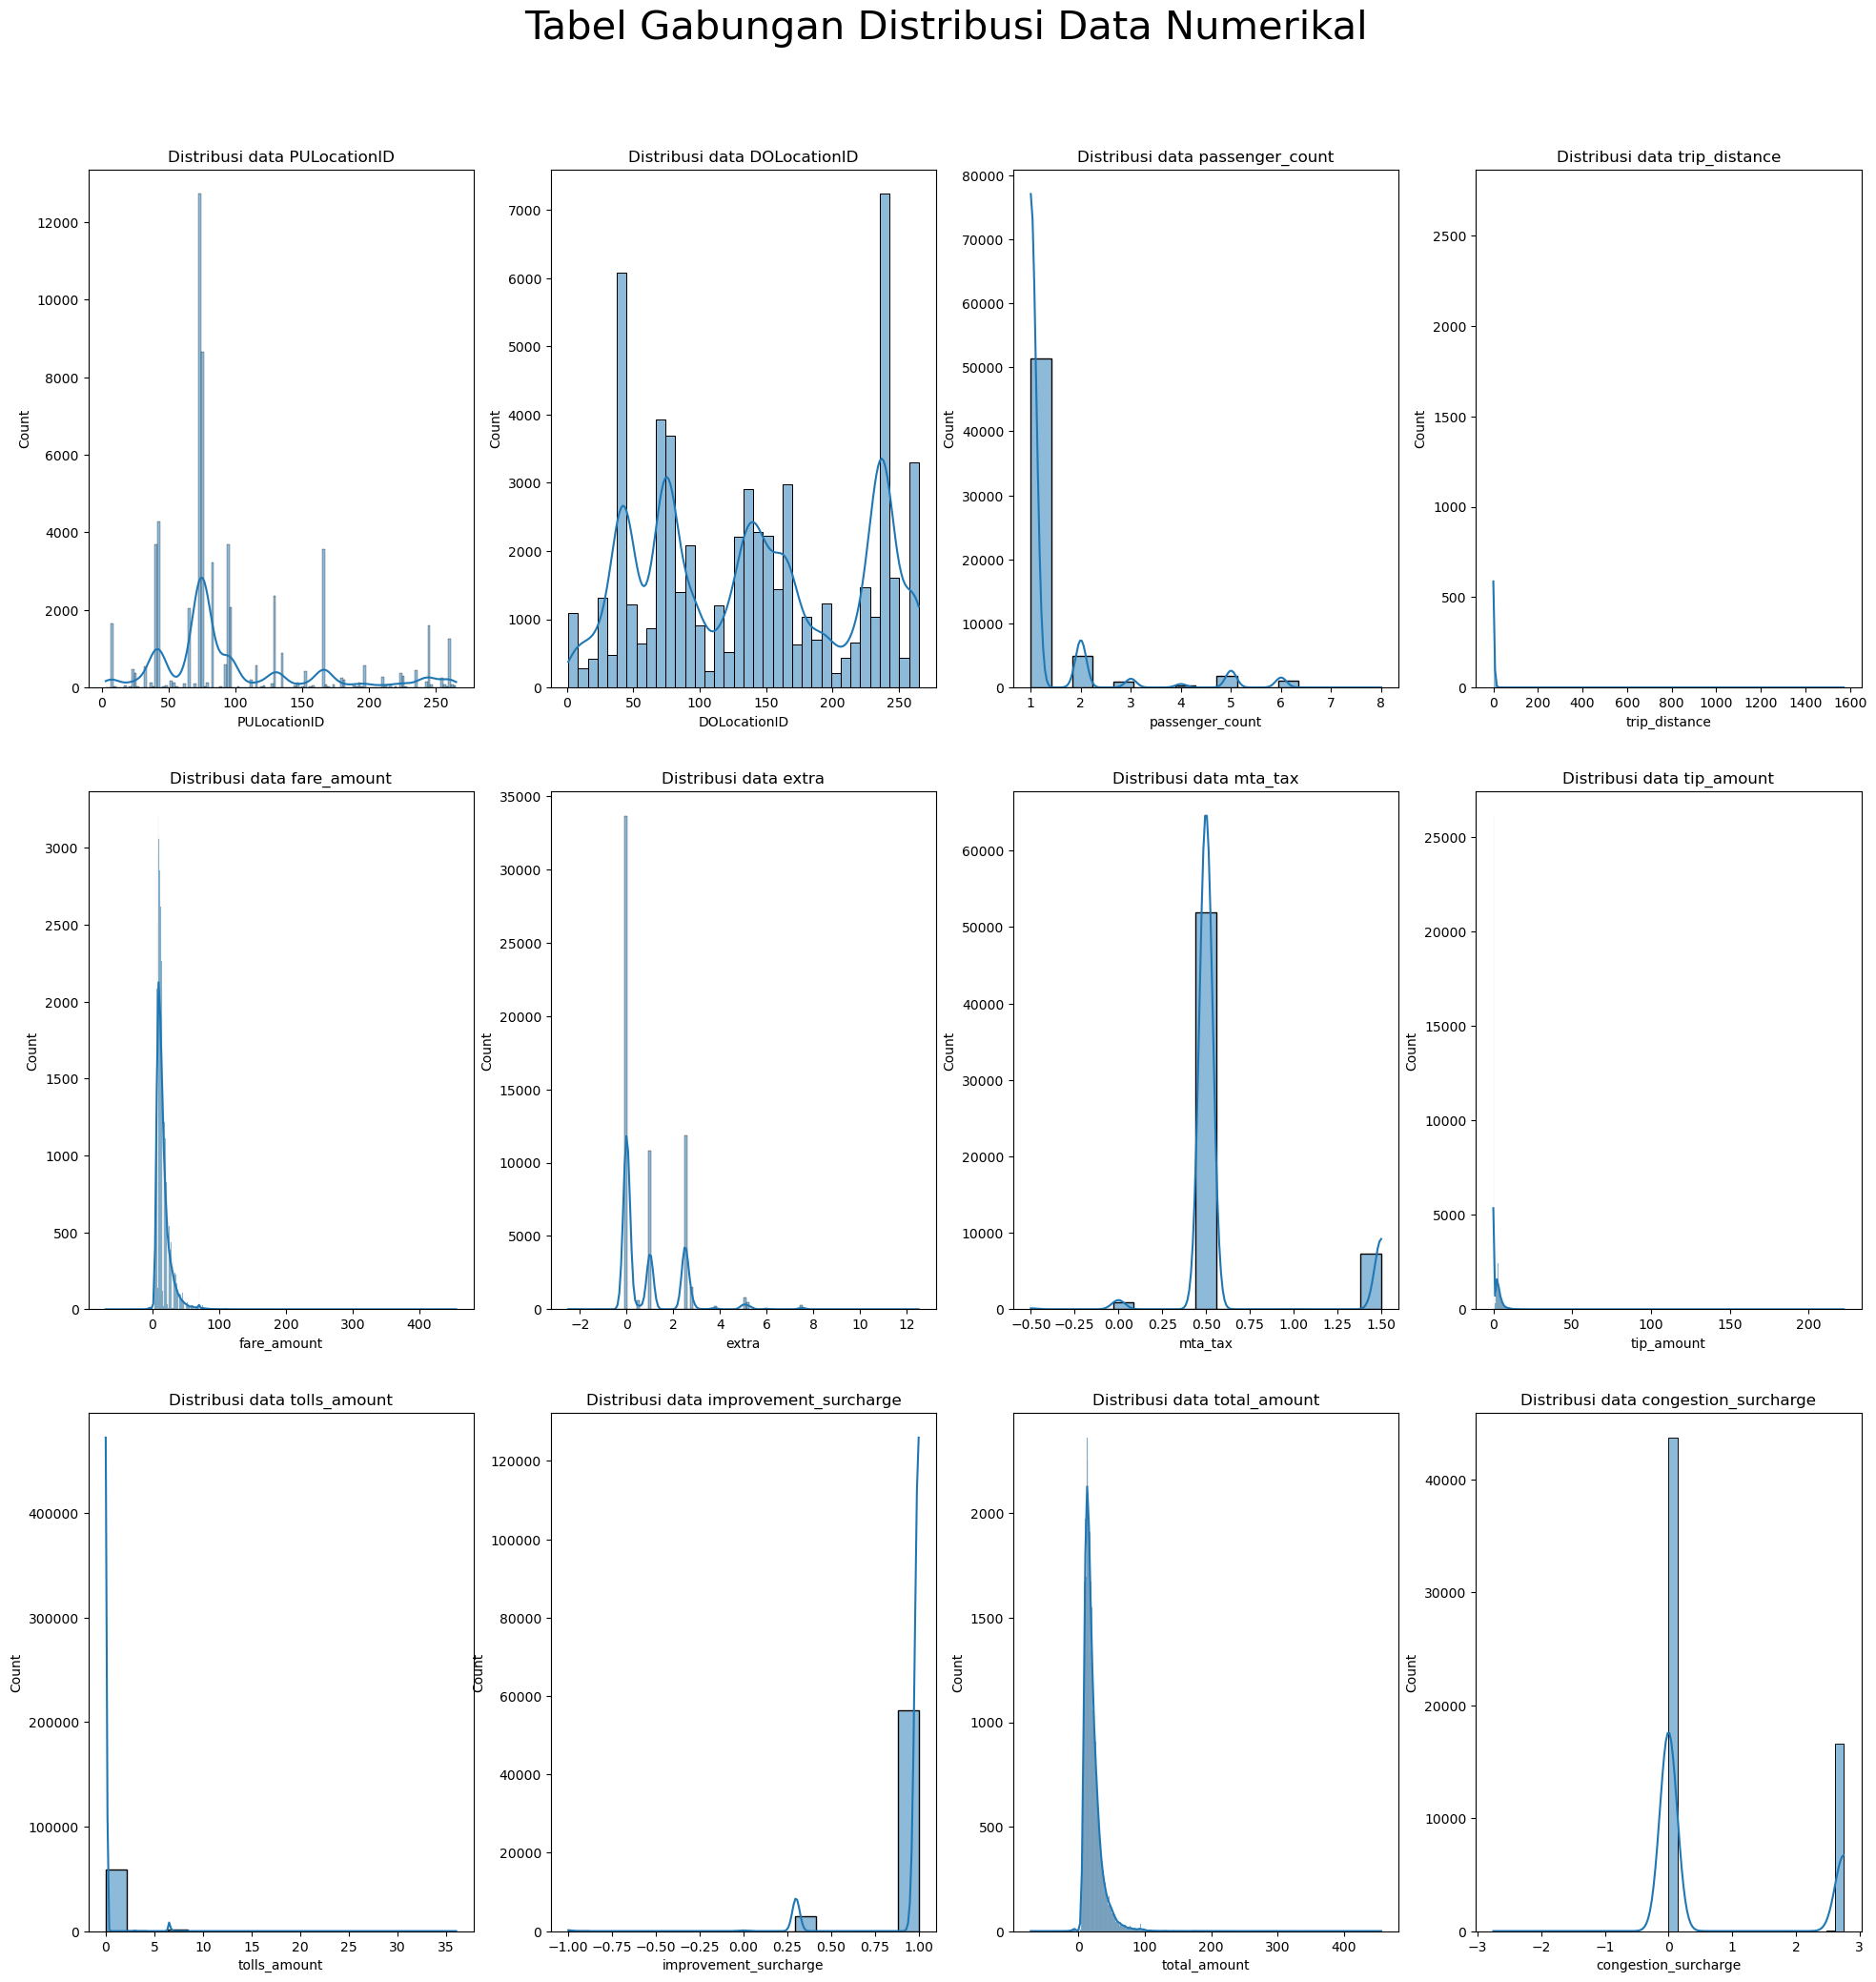

In [23]:
listKolom = ['PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']
kolom=0
n_cols=4
n_rows=3
plt.figure(figsize=(24,24))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==14 : # karena hanya ada 14 data, maka akan dibreak ketika kolom==14
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.histplot(data=df, x=listKolom[kolom], kde=True)
            plt.title(f'Distribusi data {listKolom[kolom]}')
            kolom+=1

plt.suptitle('Tabel Gabungan Distribusi Data Numerikal', size=30, y=0.95)
plt.show()

### **5.6.2 Boxplot**

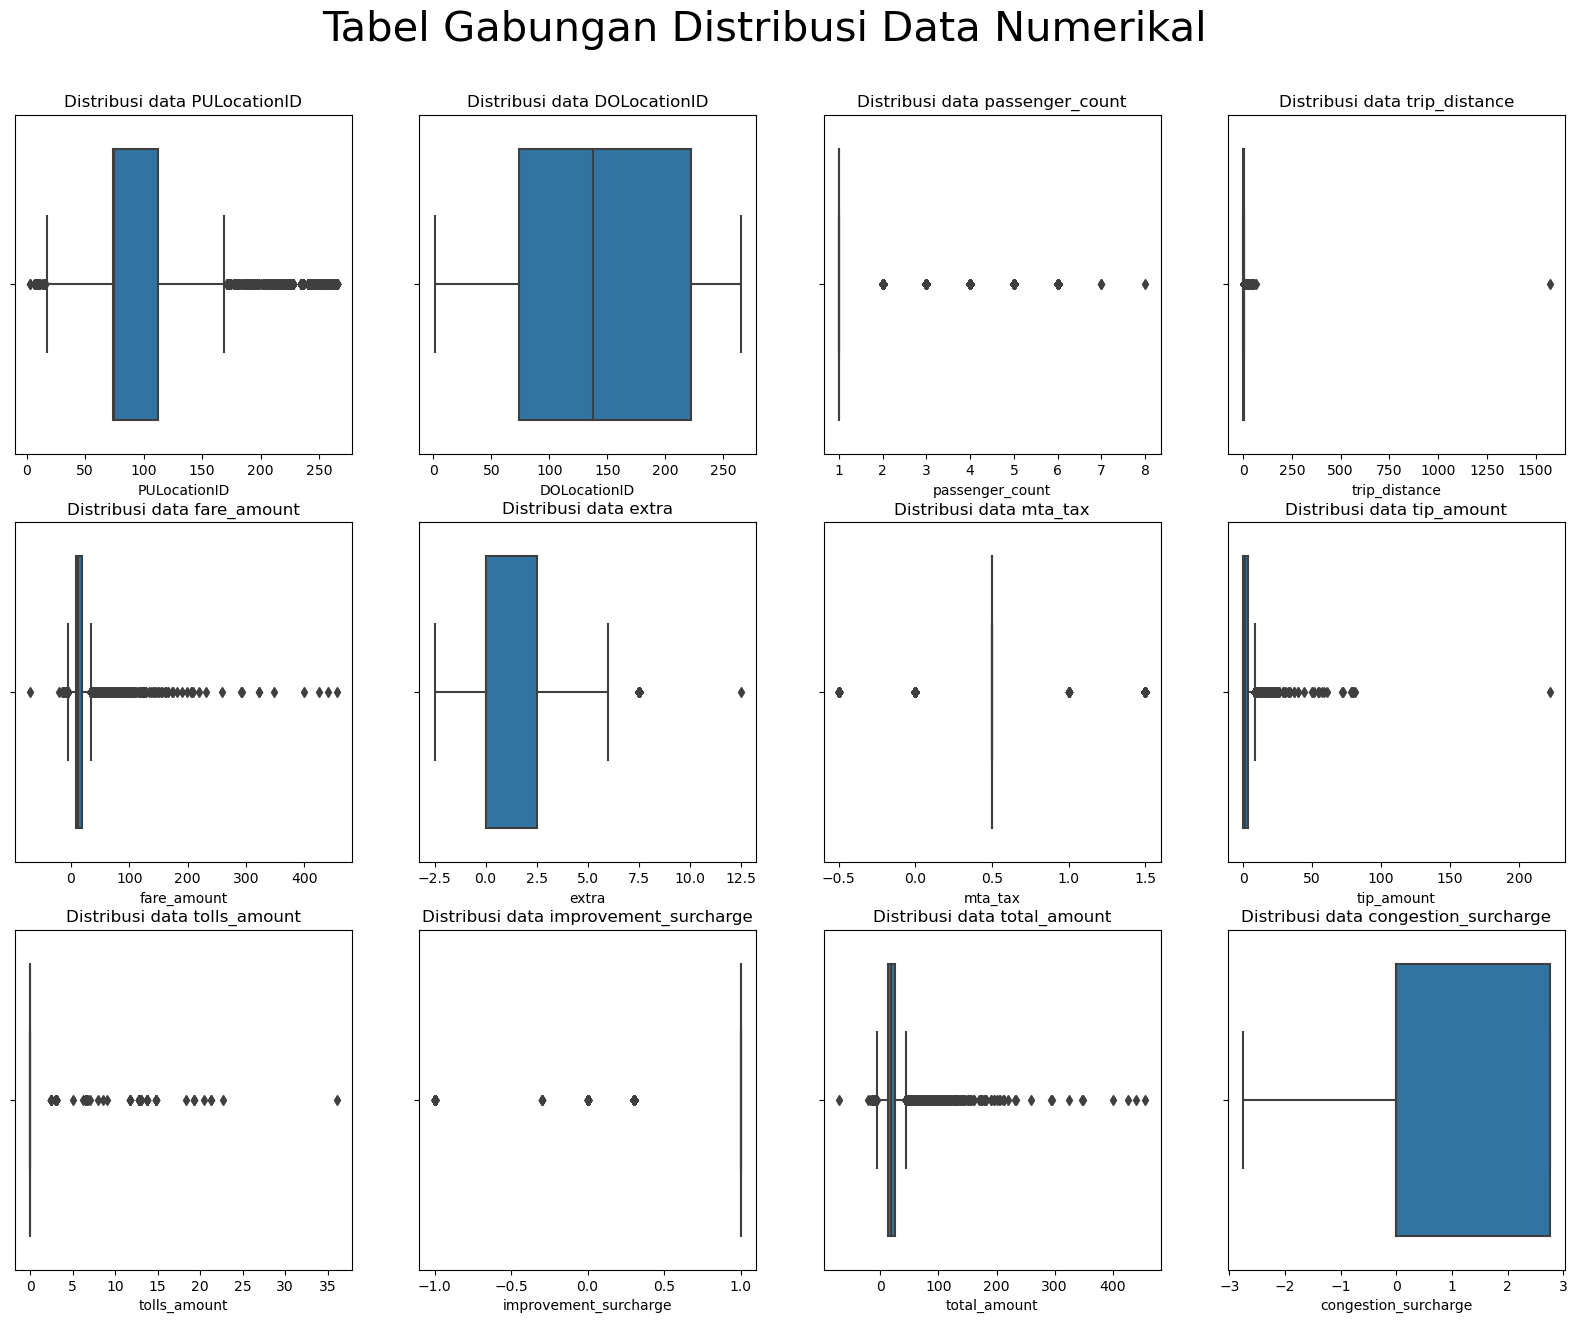

In [24]:
listKolom = ['PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']
kolom=0
n_cols=4
n_rows=3
plt.figure(figsize=(20,15))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==14 : # karena hanya ada 14 data, maka akan dibreak ketika kolom==14
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.boxplot(data=df, x=listKolom[kolom])
            plt.title(f'Distribusi data {listKolom[kolom]}')
            kolom+=1

plt.suptitle('Tabel Gabungan Distribusi Data Numerikal', size=30, y=0.95)
plt.show()

### **5.6.3 Data Distribusi Normal**

data distribusi normal digunakan untuk mengecek dari data numerikal pola data distribusi normal atau tidak. disini freelance mengimport data from scipy.stats import normaltest. data ini dicek menggunakan normal test karena untuk keakuratan data dan keseragaman data lebih banyak

In [25]:
from scipy.stats import normaltest

In [26]:
listKolom = ['PULocationID','DOLocationID','passenger_count','trip_distance', 'fare_amount','extra','mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount','congestion_surcharge']
listpvalue = []
listStatusNormal = []

for i in listKolom :
    stat,pvalue=normaltest(df[i])
    if pvalue>0.05:
        status = 'Terdistribusi normal' #fail to reject Ho
    else: 
        status = 'Tidak terdistribusi normal' #reject Ho (Ha)
    listpvalue.append(pvalue)
    listStatusNormal.append(status)

In [27]:
    dfNormalitas = pd.DataFrame({
    'Kolom' : listKolom,
    'pvalue' : listpvalue,
    'Status_Normalitas' : listStatusNormal
})
dfNormalitas

,Kolom,pvalue,Status_Normalitas
0,PULocationID,0.0,Tidak terdistribusi normal
1,DOLocationID,0.0,Tidak terdistribusi normal
2,passenger_count,0.0,Tidak terdistribusi normal
3,trip_distance,0.0,Tidak terdistribusi normal
4,fare_amount,0.0,Tidak terdistribusi normal
5,extra,0.0,Tidak terdistribusi normal
6,mta_tax,0.0,Tidak terdistribusi normal
7,tip_amount,0.0,Tidak terdistribusi normal
8,tolls_amount,0.0,Tidak terdistribusi normal
9,improvement_surcharge,0.0,Tidak terdistribusi normal


**Interpretasi Boxplot, Histogram dan Data Distribusi Normal**:

- terdiri dari 8 kolom data numerikal yang divisualisasikan dalam bentuk grafik histogram dan Boxplot
- data NYC dari data numerikal p-value <0.05 maka data distribusi tidak normal

## **5.7 Membuat tabel hari dan jam**

In [28]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60377,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
60378,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
60379,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
60380,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [29]:
df['year_pickup']= df['lpep_pickup_datetime'].dt.year
df['month_pickup']= df['lpep_pickup_datetime'].dt.month_name()
df['date_pickup']= df['lpep_pickup_datetime'].dt.day
df['day_pickup']= df['lpep_pickup_datetime'].dt.day_name()
df['hour_pickup']= df['lpep_pickup_datetime'].dt.hour
df['year_dropoff']= df['lpep_dropoff_datetime'].dt.year
df['month_dropoff']= df['lpep_dropoff_datetime'].dt.month_name()
df['date_dropoff']= df['lpep_dropoff_datetime'].dt.day
df['day_dropoff']= df['lpep_dropoff_datetime'].dt.day_name()
df['hour_dropoff']= df['lpep_dropoff_datetime'].dt.hour
df = df.reset_index(drop=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,year_pickup,month_pickup,date_pickup,day_pickup,hour_pickup,year_dropoff,month_dropoff,date_dropoff,day_dropoff,hour_dropoff
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,2023,January,1,Sunday,0,2023,January,1,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60377,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,2023,January,31,Tuesday,23,2023,January,31,Tuesday,23
60378,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,2023,January,31,Tuesday,23,2023,January,31,Tuesday,23
60379,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,2023,January,31,Tuesday,23,2023,January,31,Tuesday,23
60380,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,2023,January,31,Tuesday,23,2023,January,31,Tuesday,23


In [30]:
display(df['year_pickup'].value_counts(), df['year_dropoff'].value_counts())

2023    60379
2022        2
2009        1
Name: year_pickup, dtype: int64

2023    60379
2022        2
2009        1
Name: year_dropoff, dtype: int64

In [31]:
display(df['month_pickup'].value_counts(), df['month_dropoff'].value_counts())

January     60379
December        2
February        1
Name: month_pickup, dtype: int64

January     60366
February       14
December        2
Name: month_dropoff, dtype: int64

In [32]:
df = df.drop(df[(df['year_pickup']==2009) | (df['year_dropoff']==2009) | (df['year_pickup']==2022) | (df['year_dropoff']==2022)].index)

In [33]:
df = df.drop(df[(df['month_pickup']=='February') | (df['month_pickup']=='December') | (df['month_dropoff']=='February') | (df['month_dropoff']=='December')].index)
df = df.reset_index(drop=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,year_pickup,month_pickup,date_pickup,day_pickup,hour_pickup,year_dropoff,month_dropoff,date_dropoff,day_dropoff,hour_dropoff
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,2023,January,1,Sunday,0,2023,January,1,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60360,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,2023,January,31,Tuesday,23,2023,January,31,Tuesday,23
60361,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,2023,January,31,Tuesday,23,2023,January,31,Tuesday,23
60362,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,2023,January,31,Tuesday,23,2023,January,31,Tuesday,23
60363,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,2023,January,31,Tuesday,23,2023,January,31,Tuesday,23


In [34]:
display(df['year_pickup'].value_counts(), df['year_dropoff'].value_counts())

2023    60365
Name: year_pickup, dtype: int64

2023    60365
Name: year_dropoff, dtype: int64

In [35]:
display(df['month_pickup'].value_counts(), df['month_dropoff'].value_counts())

January    60365
Name: month_pickup, dtype: int64

January    60365
Name: month_dropoff, dtype: int64

**Interpretasi**:

- Mengambil hari dan jam pada kolom 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime' digunakan untuk menganalisa data taksi newyork yang di pickup dan drop off berdasarkan tanggal dan jam
- data tahun 2009 dan 2022 dihilangkan karena salah input data
- data bulan februari dihilangkan karena salah input data

## **5.8 Keunikan Data**

In [36]:
pd.set_option('display.max_colwidth', None)
list_kosong = []
for kolom in df.columns :
 
    list_kosong.append( [kolom, df[kolom].nunique(), df[kolom].unique()] )

data_unik = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Data Unik', 'Data sample Unik'],
                     data=list_kosong)
data_unik

,Nama Kolom,Jumlah Data Unik,Data sample Unik
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,59348,"[2023-01-01T00:26:10.000000000, 2023-01-01T00:51:03.000000000, 2023-01-01T00:13:14.000000000, 2023-01-01T00:33:04.000000000, 2023-01-01T00:53:31.000000000, 2023-01-01T00:09:14.000000000, 2023-01-01T00:11:58.000000000, 2023-01-01T00:41:29.000000000, 2023-01-01T00:50:32.000000000, 2023-01-01T00:16:12.000000000, 2023-01-01T00:08:43.000000000, 2023-01-01T00:26:32.000000000, 2023-01-01T00:18:35.000000000, 2023-01-01T00:39:32.000000000, 2023-01-01T00:49:34.000000000, 2023-01-01T00:10:45.000000000, 2023-01-01T00:35:11.000000000, 2023-01-01T00:31:06.000000000, 2023-01-01T00:14:37.000000000, 2023-01-01T00:26:21.000000000, 2023-01-01T00:41:56.000000000, 2023-01-01T00:32:02.000000000, 2023-01-01T00:55:13.000000000, 2023-01-01T00:01:31.000000000, 2023-01-01T00:22:31.000000000, 2023-01-01T00:57:28.000000000, 2023-01-01T00:35:21.000000000, 2023-01-01T00:52:52.000000000, 2023-01-01T00:32:56.000000000, 2023-01-01T00:24:01.000000000, 2023-01-01T00:46:48.000000000, 2023-01-01T00:40:58.000000000, 2023-01-01T00:20:23.000000000, 2023-01-01T01:49:24.000000000, 2023-01-01T00:41:53.000000000, 2023-01-01T00:56:26.000000000, 2023-01-01T00:33:10.000000000, 2023-01-01T00:58:28.000000000, 2023-01-01T00:42:49.000000000, 2023-01-01T00:48:21.000000000, 2023-01-01T00:08:05.000000000, 2023-01-01T00:13:47.000000000, 2023-01-01T00:16:10.000000000, 2023-01-01T00:04:25.000000000, 2023-01-01T00:33:38.000000000, 2023-01-01T00:46:08.000000000, 2023-01-01T01:00:08.000000000, 2023-01-01T00:28:04.000000000, 2023-01-01T00:23:04.000000000, 2023-01-01T00:34:07.000000000, 2023-01-01T00:52:03.000000000, 2023-01-01T00:25:31.000000000, 2023-01-01T00:53:09.000000000, 2023-01-01T00:42:37.000000000, 2023-01-01T00:39:52.000000000, 2023-01-01T00:15:32.000000000, 2023-01-01T00:06:48.000000000, 2023-01-01T00:14:13.000000000, 2023-01-01T00:52:48.000000000, 2023-01-01T00:34:13.000000000, 2023-01-01T00:44:41.000000000, 2023-01-01T00:11:12.000000000, 2023-01-01T01:44:43.000000000, 2023-01-01T01:04:44.000000000, 2023-01-01T01:48:11.000000000, 2023-01-01T01:11:39.000000000, 2023-01-01T01:54:25.000000000, 2023-01-01T01:59:10.000000000, 2023-01-01T01:22:35.000000000, 2023-01-01T01:37:10.000000000, 2023-01-01T01:46:22.000000000, 2023-01-01T01:59:48.000000000, 2023-01-01T01:09:49.000000000, 2023-01-01T01:23:35.000000000, 2023-01-01T01:53:20.000000000, 2023-01-01T01:32:14.000000000, 2023-01-01T01:01:05.000000000, 2023-01-01T01:34:41.000000000, 2023-01-01T01:52:08.000000000, 2023-01-01T01:49:28.000000000, 2023-01-01T01:03:59.000000000, 2023-01-01T01:13:11.000000000, 2023-01-01T01:40:06.000000000, 2023-01-01T01:33:50.000000000, 2023-01-01T01:45:19.000000000, 2023-01-01T01:51:29.000000000, 2023-01-01T01:34:07.000000000, 2023-01-01T01:10:08.000000000, 2023-01-01T01:32:17.000000000, 2023-01-01T01:48:28.000000000, 2023-01-01T01:30:43.000000000, 2023-01-01T01:51:10.000000000, 2023-01-01T01:09:36.000000000, 2023-01-01T01:19:54.000000000, 2023-01-01T01:31:10.000000000, 2023-01-01T01:42:30.000000000, 2023-01-01T00:57:51.000000000, 2023-01-01T01:49:30.000000000, 2023-01-01T01:30:39.000000000, 2023-01-01T01:27:06.000000000, ...]"
2,lpep_dropoff_datetime,59258,"[2023-01-01T00:37:11.000000000, 2023-01-01T00:57:49.000000000, 2023-01-01T00:19:03.000000000, 2023-01-01T00:39:02.000000000, 2023-01-01T01:11:04.000000000, 2023-01-01T00:26:39.000000000, 2023-01-01T00:24:55.000000000, 2023-01-01T00:46:26.000000000, 2023-01-01T01:13:42.000000000, 2023-01-01T00:41:43.000000000, 2023-01-01T00:17:08.000000000, 2023-01-01T00:45:31.000000000, 2023-01-01T00:30:09.000000000, 2023-01-01T01:18:06.000000000, 2023-01-01T01:08:23.000000000, 2023-01-01T00:19:37.000000000, 2023-01-01T01:17:35.000000000, 2023-01-01T00:42:23.000000000, 2023-01-01T00:21:50.000000000, 2023-01-01T00:30:26.000000000, 2023-01-01T00:46:06.000000000, 2023-01-01T00:41:25.000000000, 2023-01-01T00:59:47.000000000, 2023-01-01T00:16:02.000000000, 2023-01-01T00:39:24

**Interpretasi dari data diatas sebagai berikut:**

- data dari NYC TLC trip record terdiri dari 60365 baris dan 29 kolom
- Sudah tidak ada missing value
- Data set dari NYC TLC trip record tidak ada data yang duplikat(data ganda)
- Mengambil hari dan jam pada kolom 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime' digunakan untuk menganalisa data taksi newyork yang di pickup dan drop off berdasarkan tanggal dan jam yaitu penambahan 10 kolom digunakan untuk mempermudah analisa data'year_pickup', 'month_pickup', 'date_pickup', 'day_pickup', 'hour_pickup', 'year_dropoff', 'month_dropoff', 'date_dropoff', 'day_dropoff', 'hour_dropoff'
- Data tahun 2009 dan 2022 dihilangkan karena salah input data
- Data bulan februari dihilangkan karena salah input data
- Terdiri dari 8 kolom data numerikal yang divisualisasikan dalam bentuk grafik histogram dan Boxplot
- Data NYC dari data numerikal p-value <0.05 maka data distribusi tidak normal
- Data dari NYC TLC trip record yang sudah dihilangkan data 0 dari 'trip_distance' dan 'passenger_count'
- Data 0 di 'trip_distance' perlu dihilangkan karena tidak ada perjalanan, sehingga dihilangkan
- Data 0 di 'passenger_count' perlu dihilangkan karena tidak ada penumpang, sehingga dihilangkan
- Tabel ratecodeID ada data 99 sudah dihilangkan karena dianggap error

**Rekomendasi**:

- data 0 di 'trip_distance' dihilangkan karena tidak dibutuhkan
- data 0 di 'passenger_count' dihilangkan karena tidak dibutuhkan

## **5.9 Menyimpan data sudah dibersihkan**

In [37]:
df.to_excel('NYC TLC Trip Record Sudah Bersih.xlsx')

In [38]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,year_pickup,month_pickup,date_pickup,day_pickup,hour_pickup,year_dropoff,month_dropoff,date_dropoff,day_dropoff,hour_dropoff
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,2023,January,1,Sunday,0,2023,January,1,Sunday,1


data sudah bersih dan disimpan menggunakan format excel. format excel untuk memvisualisasikan data melalui tableau

# **6. Data Analysis**

___

Data NYC sudah data understanding dan data cleaning perlu dilakukan data analysis untuk mengetahui permasalahan yang terjadi pada Data NYC dan data NYC yang dianalisa bulan januari tahun 2023

In [39]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,year_pickup,month_pickup,date_pickup,day_pickup,hour_pickup,year_dropoff,month_dropoff,date_dropoff,day_dropoff,hour_dropoff
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,2023,January,1,Sunday,0,2023,January,1,Sunday,0
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,2023,January,1,Sunday,0,2023,January,1,Sunday,1


## **6.1 Korelasi**

korelasi untuk mengetahui saling keterkaitan hubungan sesama data statistik numerikal, metode korelasi yang digunakan adalah spearman karena distribusi tidak normal.

In [40]:
corr = df[['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge']]

In [41]:
df_corr = corr.corr(method='spearman')
df_corr

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
VendorID,1.000000,0.025540,0.045277,-0.008923,0.017344,-0.004767,0.049653,-0.157898,-0.932814,0.013777,0.010686,-0.082194,0.044954,-0.011655,0.027642,-0.024209
RatecodeID,0.025540,1.000000,0.043907,0.012034,0.027637,0.040521,0.122135,-0.093660,-0.321258,-0.007674,0.138080,-0.068269,0.093514,-0.004380,0.852006,-0.055065
PULocationID,0.045277,0.043907,1.000000,0.060223,0.030424,0.091859,0.094788,0.067943,-0.056102,-0.035507,0.017923,0.016831,0.069926,0.065403,0.039924,-0.121291
DOLocationID,-0.008923,0.012034,0.060223,1.000000,0.002544,0.220676,0.206776,0.071427,0.009053,0.170490,0.006205,-0.007535,0.281166,-0.106030,0.004817,0.425325
passenger_count,0.017344,0.027637,0.030424,0.002544,1.000000,0.017185,0.029140,0.012042,-0.026599,0.015967,0.006757,0.035357,0.032431,-0.005956,0.026076,0.009706
trip_distance,-0.004767,0.040521,0.091859,0.220676,0.017185,1.000000,0.927816,0.073954,0.004687,0.280532,0.215652,0.017725,0.888240,-0.080965,0.004606,0.320731
fare_amount,0.049653,0.122135,0.094788,0.206776,0.029140,0.927816,1.000000,0.040113,-0.069561,0.280484,0.206467,0.051233,0.944813,-0.075281,0.086793,0.303619
extra,-0.157898,-0.093660,0.067943,0.071427,0.012042,0.073954,0.040113,1.000000,0.183437,0.117104,0.052231,0.053176,0.189046,-0.081240,-0.089684,0.075953
mta_tax,-0.932814,-0.321258,-0.056102,0.009053,-0.026599,0.004687,-0.069561,0.183437,1.000000,-0.001142,-0.027946,0.132969,-0.055133,0.003028,-0.336703,0.040868
tip_amount,0.013777,-0.007674,-0.035507,0.170490,0.015967,0.280532,0.280484,0.117104,-0.001142,1.000000,0.091252,0.005541,0.479687,-0.786295,-0.017742,0.339526


In [42]:
matriks = np.triu(df_corr)
matriks

array([[ 1.        ,  0.02553979,  0.04527693, -0.00892349,  0.01734399,
        -0.00476701,  0.04965289, -0.15789789, -0.93281382,  0.01377667,
         0.01068571, -0.08219363,  0.04495421, -0.01165511,  0.02764189,
        -0.02420909],
       [ 0.        ,  1.        ,  0.04390685,  0.01203371,  0.02763721,
         0.04052102,  0.12213544, -0.0936598 , -0.32125776, -0.00767446,
         0.13807964, -0.06826886,  0.09351363, -0.00437983,  0.85200646,
        -0.05506465],
       [ 0.        ,  0.        ,  1.        ,  0.06022265,  0.03042435,
         0.09185856,  0.09478827,  0.06794344, -0.05610212, -0.0355065 ,
         0.0179232 ,  0.01683128,  0.06992569,  0.06540267,  0.03992414,
        -0.12129057],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.00254446,
         0.22067612,  0.2067756 ,  0.07142721,  0.00905263,  0.17048952,
         0.0062052 , -0.00753525,  0.28116578, -0.1060302 ,  0.00481669,
         0.42532512],
       [ 0.        ,  0.        ,  0

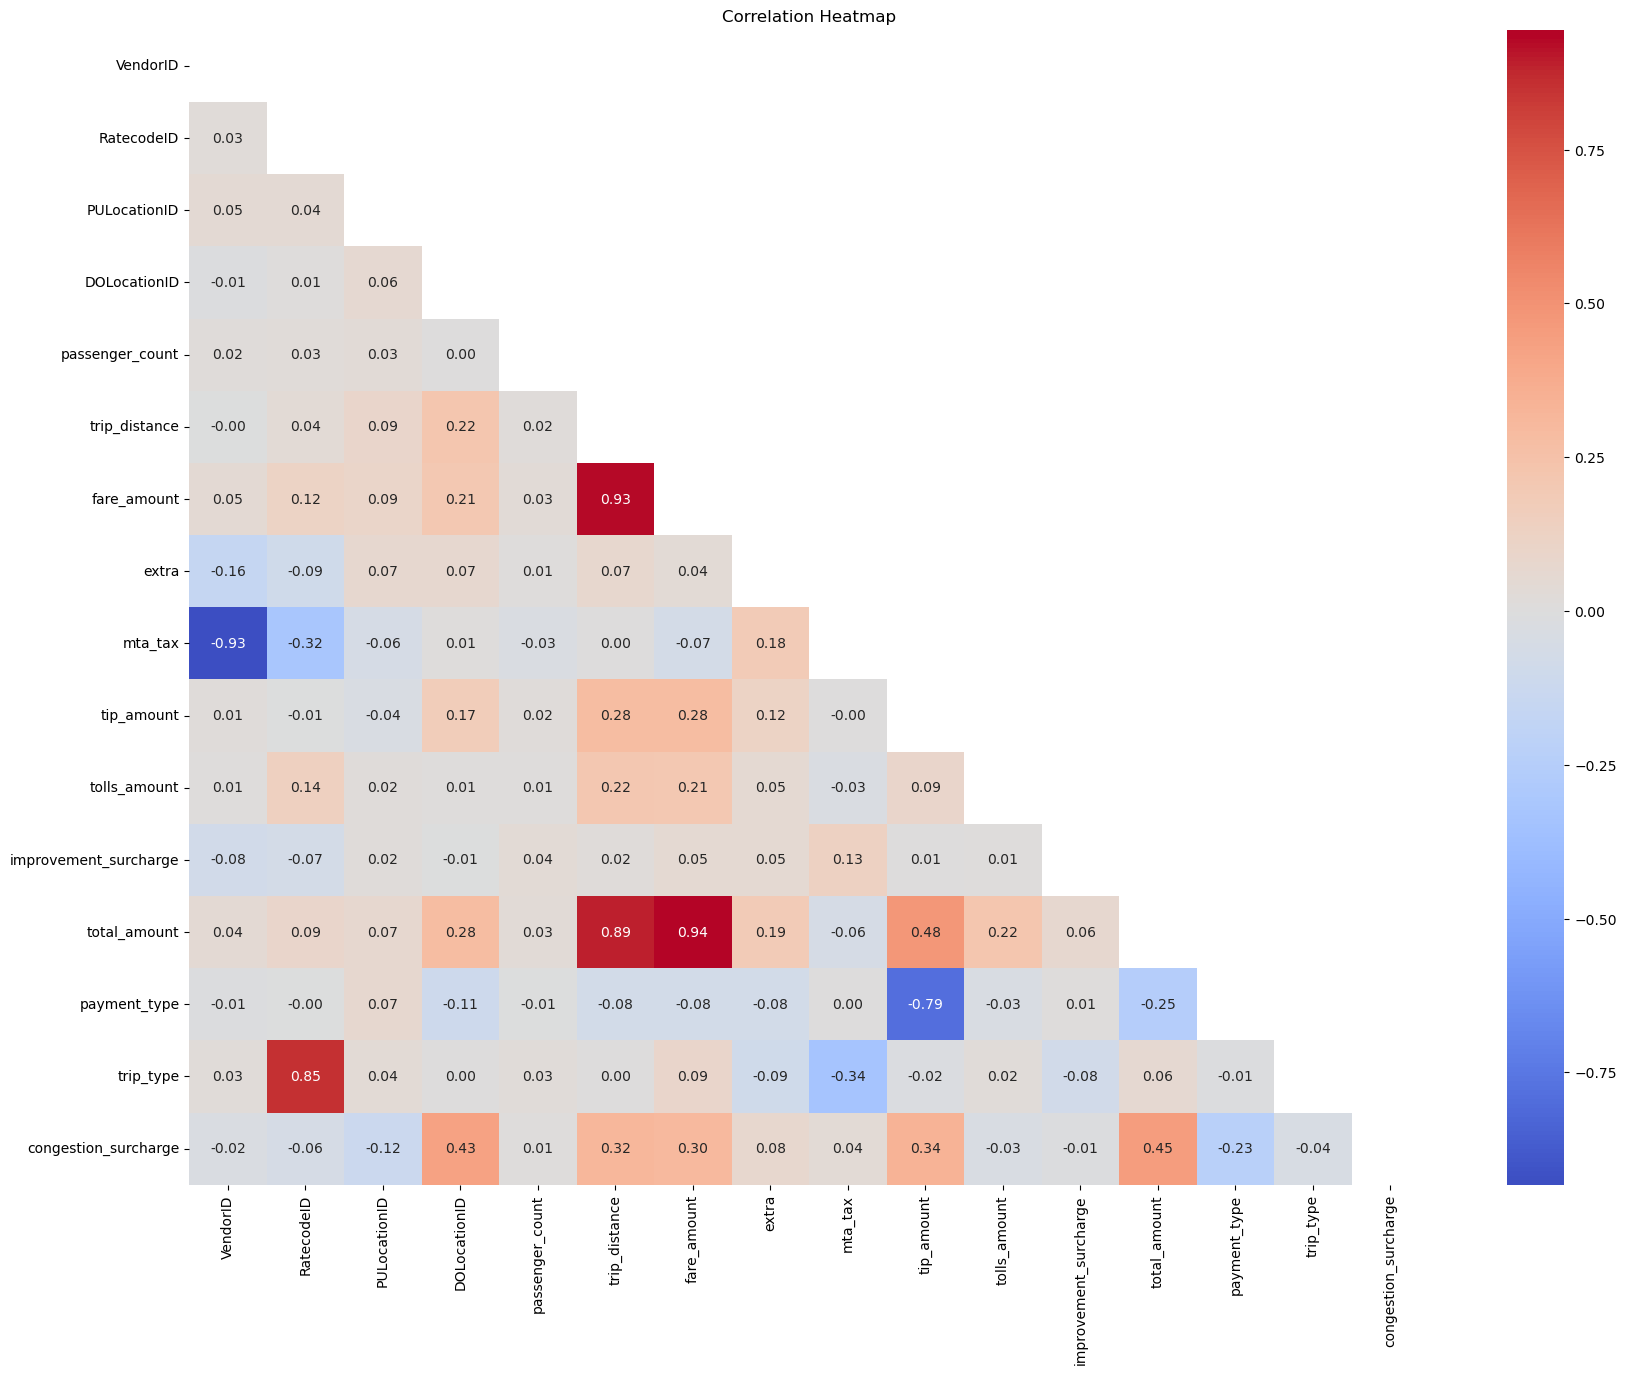

In [43]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', center=0, mask=matriks, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Interpretasi:**

- Korelasi nilai positif kuat sebesar 0.94 untuk total amount dengan fare amount, nilai total amount naik maka nilai fare amount naik
- Korelasi nilai positif kuat sebesar 0.93 untuk fare amount dengan trip_distance, nilai trip distance naik maka nilai fare amount naik
- Korelasi nilai positif cukup kuat sebesar 0.48 untuk yang cukup kuat total amount dan tip amount, nilai total amount naik maka nilai tip amount cukup naik 
- Korelasi nilai positif cukup  kuat sebesar 0.43 untuk total amount dan congestion surcharge, nilai total amount naik maka nilai congestion surcharge cukup naik
- Korelasi yang paling lemah kuat sebesar -0.93 untuk vendorID dan mta_tax, nilai vendor ID turun maka nilai mta_tax naik
- korelasi yang paling lemah kuat sebesar -0.79 untuk payment type dan tip_amount, nilai payment type tidak turun maka nilai tip amount turun

## **6.2. Total Amount**

Data Total Amount yang dianalisa yaitu Total Amount berdasarkan tanggal, hari, dan jam

### **6.2.1 Total Amount berdasarkan tanggal**

In [44]:
df_amount = df[['day_pickup', 'day_dropoff', 'date_pickup', 'date_dropoff','hour_pickup', 'hour_dropoff','total_amount']]
df_amount.head()

,day_pickup,day_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,total_amount
0,Sunday,Sunday,1,1,0,0,24.18
1,Sunday,Sunday,1,1,0,0,15.84
2,Sunday,Sunday,1,1,0,0,10.20
3,Sunday,Sunday,1,1,0,0,8.00
4,Sunday,Sunday,1,1,0,1,22.95


In [45]:
df_amount1 = df.groupby('date_pickup')[['total_amount']].sum()
df_amount2 = df.groupby('date_dropoff')[['total_amount']].sum()
display((df_amount1.head()), (df_amount2.head()))

,total_amount
date_pickup,
1,27296.82
2,28669.94
3,38587.97
4,43206.96
5,45939.22


,total_amount
date_dropoff,
1,26999.76
2,28687.69
3,38608.11
4,43060.53
5,45875.15


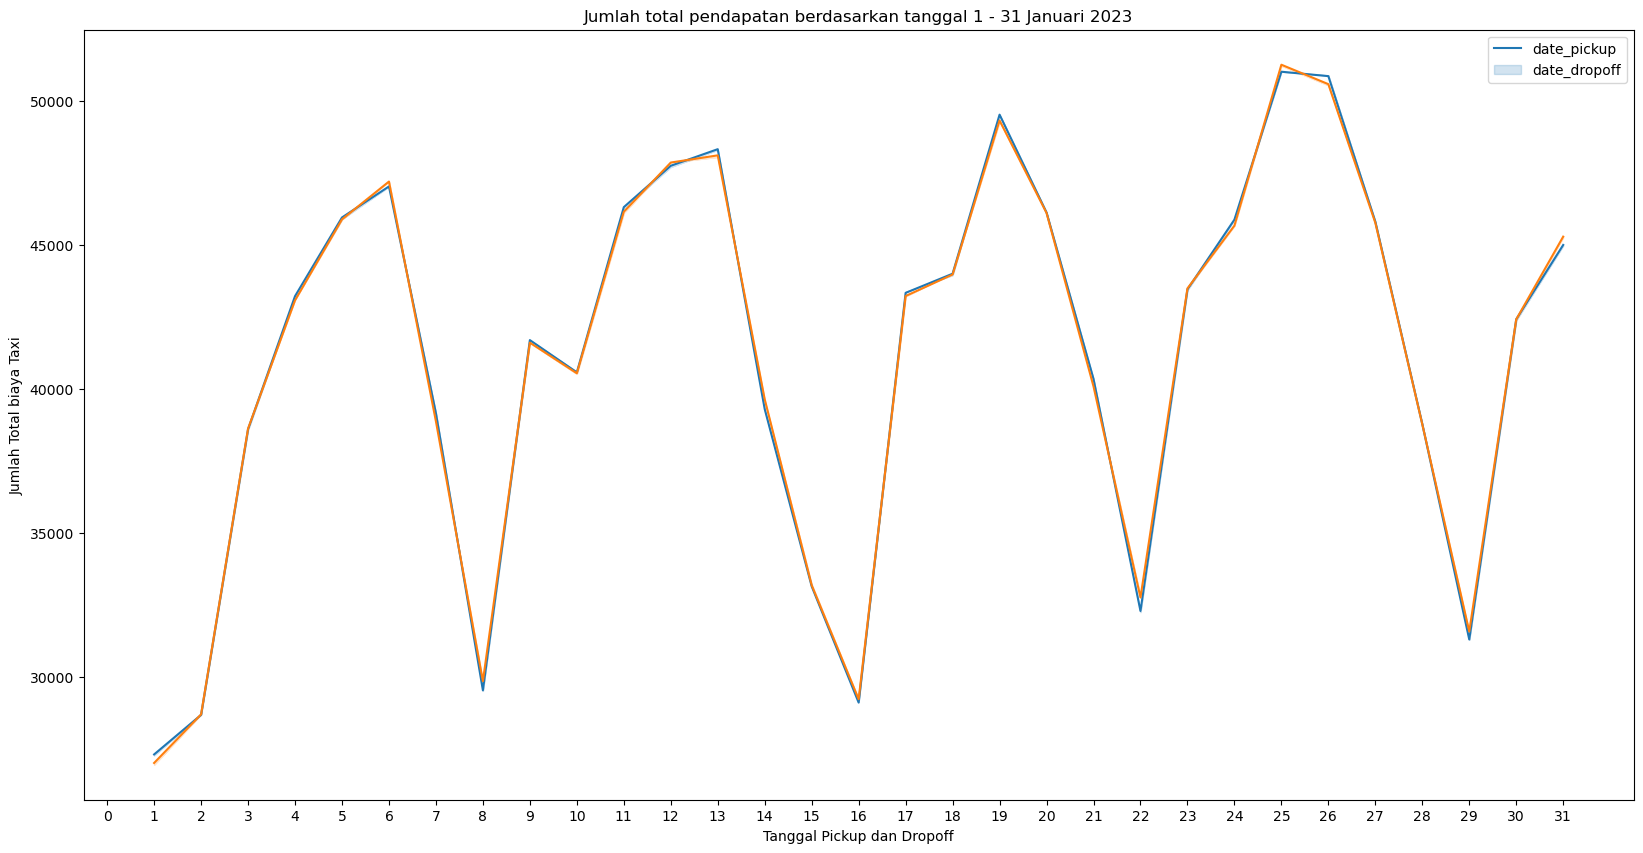

In [46]:
plt.figure(figsize=(20,10))


sns.lineplot(
    data = df_amount,
    x = 'date_pickup',
    y = 'total_amount',
    estimator = np.sum,
    errorbar= ('ci', 0)
)

sns.lineplot(
    data = df_amount,
    x = 'date_dropoff',
    y = 'total_amount',
    estimator = np.sum,
    errorbar= ('ci', 0)         
)

plt.xticks(range(0,32))
plt.title('Jumlah total pendapatan berdasarkan tanggal 1 - 31 Januari 2023')
plt.ylabel('Jumlah Total biaya Taxi')
plt.xlabel('Tanggal Pickup dan Dropoff')
plt.legend(['date_pickup', 'date_dropoff'])
plt.show()

**Interpretasi**

- Tanggal 1 - 31 Januari 2023 menunjukkan grafik fluktuatif jumlah total pendapatan
- Tanggal 1 - 5 Januari 2023 menunjukkan grafik cenderung meningkat hari kerja 
- Tanggal 6 - 8 Januari 2023 menunjukkan grafik cenderung menurun hari sabtu dan minggu 
- Tanggal 9 - 13 Januari 2023 menunjukkan grafik fluktuatif naik hari kerja 
- Tanggal 14 - 16 Januari 2023 menunjukkan grafik cenderung menurun hari kerja
- Tanggal 17 - 19 Januari 2023 menunjukkan grafik fluktuatif hari sabtu dan minggu 
- Tanggal 20 - 22 Januari 2023 menunjukkan grafik cenderung hari kerja
- Tanggal 23 - 25 Januari 2023 menunjukkan grafik fluktuatif hari kerja
- Tanggal 26 - 29 Januari 2023 menunjukkan grafik cenderung hari kerja
- Tanggal 30 dan 31 Januari 2023 menunjukkan grafik cenderung hari kerja
- Hari kerja orang - orang bekerja sering menggunakan taxi untuk pergi ke tempat satu ke tempat lainnya
- Hari tidak kerja orang - orang cenderung kurang beraktivitas dan beristirahat

**Rekomendasi**

- Mencari penumpang dan memberikan promo yang menggunakan Taxi hari sabtu dan minggu

### **6.2.2 Total Amount berdasarkan hari**

In [47]:
df_amount3 = df.groupby('day_pickup')[['total_amount']].sum()
df_amount4 = df.groupby('day_dropoff')[['total_amount']].sum()
display((df_amount3.head()), (df_amount4.head()))

,total_amount
day_pickup,
Friday,187232.83
Monday,185297.73
Saturday,157530.49
Sunday,153515.70
Thursday,194028.67


,total_amount
day_dropoff,
Friday,187131.16
Monday,185373.59
Saturday,157319.17
Sunday,154320.87
Thursday,193596.26


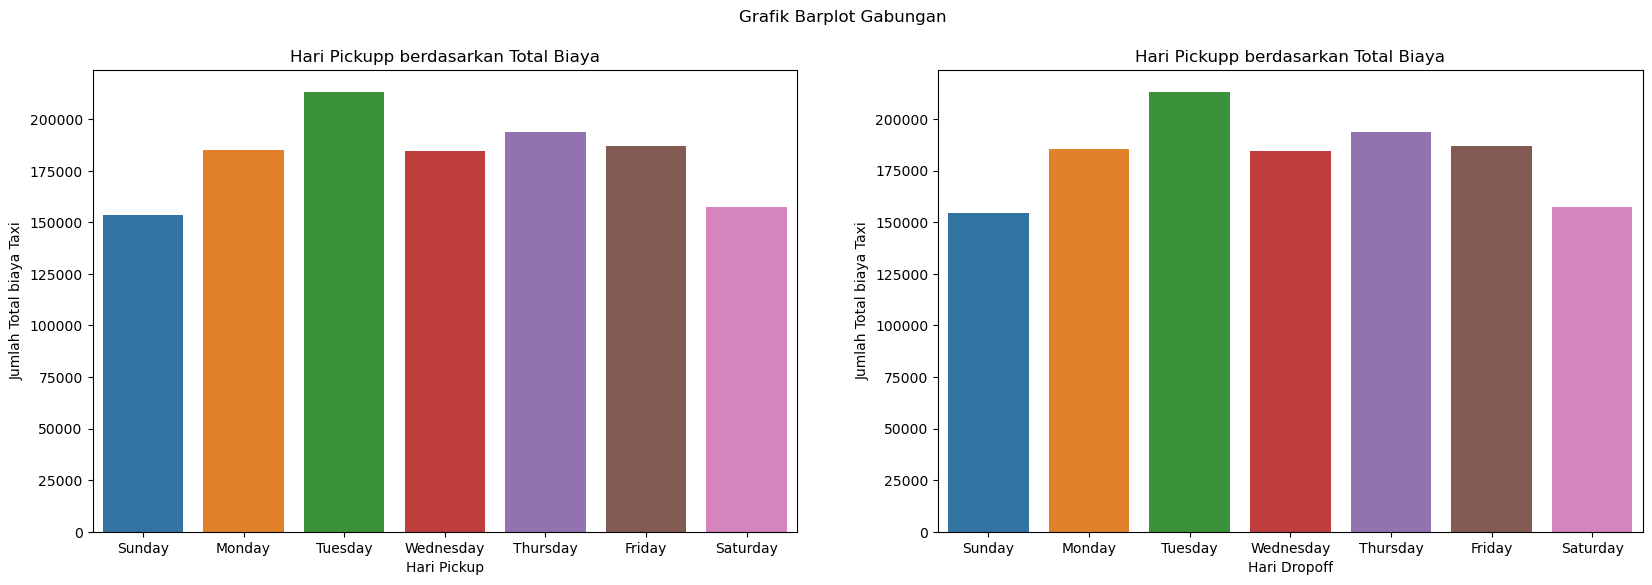

In [48]:
plt.figure(figsize=(20, 6))

plt.suptitle("Grafik Barplot Gabungan", size=12)


plt.subplot(1,2,1) # 1 baris, 3 kolom, pada subplot ke-1
sns.barplot(data=df_amount, x='day_pickup', y='total_amount', errorbar= ('ci', 0), estimator=np.sum)
plt.title('Hari Pickupp berdasarkan Total Biaya')
plt.ylabel('Jumlah Total biaya Taxi')
plt.xlabel('Hari Pickup')


plt.subplot(1,2,2) # 1 baris, 3 kolom, pada subplot ke-1
sns.barplot(data=df_amount, x='day_dropoff', y='total_amount', errorbar= ('ci', 0), estimator=np.sum)
plt.title('Hari Pickupp berdasarkan Total Biaya')
plt.ylabel('Jumlah Total biaya Taxi')
plt.xlabel('Hari Dropoff')
plt.show()

**Interpretasi**

- senin sampai jumat grafik cenderung meningkat orang beraktivitas seperti bekerja, wisata, dan lain-lain sering menggunakan taxi
- sabtu dan minggu grafik turun orang kurang beraktivitas dan istirahat jarang menggunakan taxi
- hari selasa grafik paling tinggi orang-orang seperti ada event atau acara tertentu pada hari selasa biaya paling tinggi

**Rekomendasi**
- mencari penumpang  dan memberikan promo menggunakan taxi di hari sabtu dan minggu

### **6.2.3 Total Amount berdasarkan jam**

In [49]:
df_amount5 = df.groupby('hour_pickup')[['total_amount']].sum()
df_amount6 = df.groupby('hour_dropoff')[['total_amount']].sum()
display((df_amount5.head()), (df_amount6.head()))

,total_amount
hour_pickup,
0,19929.76
1,17075.84
2,12313.95
3,12056.82
4,8585.91


,total_amount
hour_dropoff,
0,22972.69
1,17032.46
2,13218.12
3,12101.10
4,10198.07


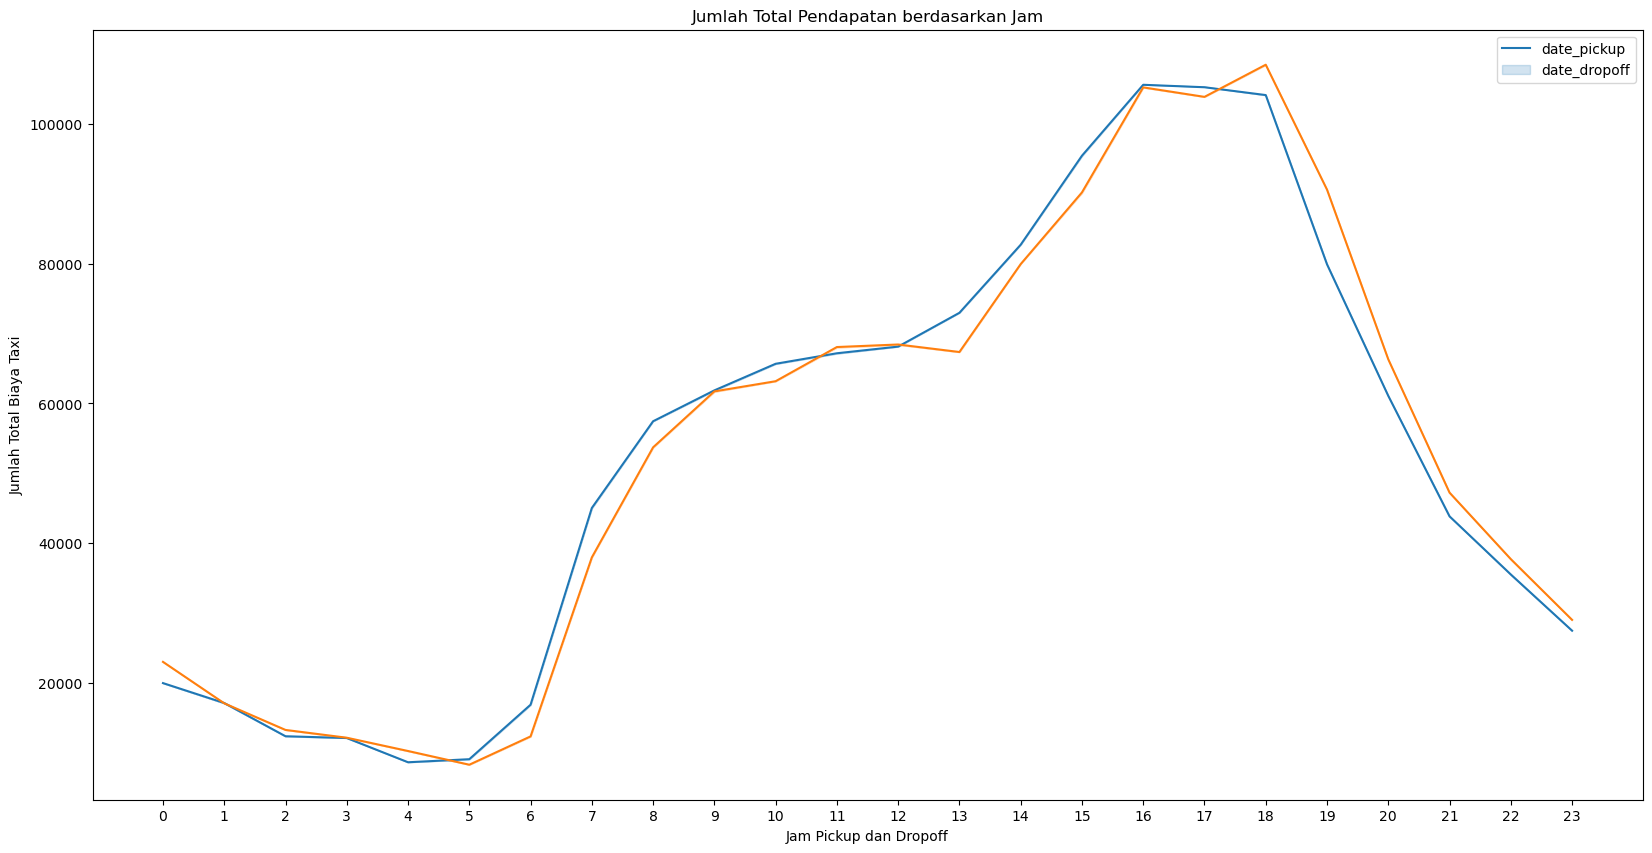

In [50]:
plt.figure(figsize=(20,10))

sns.lineplot(
    data = df_amount,
    x = 'hour_pickup',
    y = 'total_amount',
    estimator = np.sum,
    errorbar= ('ci', 0)
)
sns.lineplot(
    data = df_amount,
    x = 'hour_dropoff',
    y = 'total_amount',
    estimator = np.sum,
    errorbar= ('ci', 0)         
)

plt.xticks(range(0,24))
plt.title('Jumlah Total Pendapatan berdasarkan Jam')
plt.ylabel('Jumlah Total Biaya Taxi')
plt.xlabel('Jam Pickup dan Dropoff')
plt.legend(['date_pickup', 'date_dropoff'])
plt.show()

**Interpretasi**

- Jam 12 Malam - 11 Malam  menunjukkan grafik fluktuatif jumlah penumpang taxi
- Jam 12 Malam - 5 Pagi menunjukkan grafik cenderung menurun 
- Jam 6 Pagi - 12 Siang menunjukkan grafik cenderung naik 
- Jam 1 Siang - 4 Sore menunjukkan grafik cenderung naik 
- Jam 5 Sore - 6 Sore Menunjukkan grafik cenderung naik
- Jam 7 Malam - 11 Malam Menunjukkan grafik cenderung turun
- pada jam 12 malam sampai jam 5 pagi menunjukkan cenderung grafik menurun pendapatan taxi kurang ada aktivitas dan orang-orang beristirahat untuk di jam 12 malam sampai jam 5 pagi
- pada jam 1 siang sedikit menurun grafik karena orang sudah kembali istrahat dari jam kerja dan orang-orang kembali ke kantor 
- pada jam 6 pagi sampai jam 7 malam menunujukkan signifikan naik pendapatan taxi karena orang-orang beraktivitas seperti bekerja, wisata, dan lainnya
- pada jam 8 - 11 malam menunujukkan cenderung menurun pendapatan taxi karena orang-orang mulai istrahat

**Rekomendasi**
- pada jam 1 siang perlu ditingkatkan mencari penumpang setelah jam istirahat kantor selesai dan kembali ke kantor

## **6.3 Trip Distance**

Data Trip Distance yang dianalisa yaitu Total Amount berdasarkan tanggal, hari, dan jam

In [51]:
df_trip = df[['day_pickup', 'day_dropoff', 'date_pickup', 'date_dropoff','hour_pickup', 'hour_dropoff', 'trip_distance']]
df_trip

,day_pickup,day_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,trip_distance
0,Sunday,Sunday,1,1,0,0,2.58
1,Sunday,Sunday,1,1,0,0,1.81
2,Sunday,Sunday,1,1,0,0,1.30
3,Sunday,Sunday,1,1,0,0,1.10
4,Sunday,Sunday,1,1,0,1,2.78
...,...,...,...,...,...,...,...
60360,Tuesday,Tuesday,31,31,23,23,2.75
60361,Tuesday,Tuesday,31,31,23,23,2.44
60362,Tuesday,Tuesday,31,31,23,23,1.40
60363,Tuesday,Tuesday,31,31,23,23,2.47


### **6.3.1 Total Amount berdasarkan Tanggal**

In [52]:
df_trip1 = df.groupby('date_pickup')[['trip_distance']].sum()
df_trip2 = df.groupby('date_dropoff')[['trip_distance']].sum()
display((df_trip1.head()), (df_trip2.head()))

,trip_distance
date_pickup,
1,3709.87
2,3990.80
3,4859.08
4,5390.03
5,5949.64


,trip_distance
date_dropoff,
1,3669.12
2,3989.05
3,4864.95
4,5358.57
5,5945.87


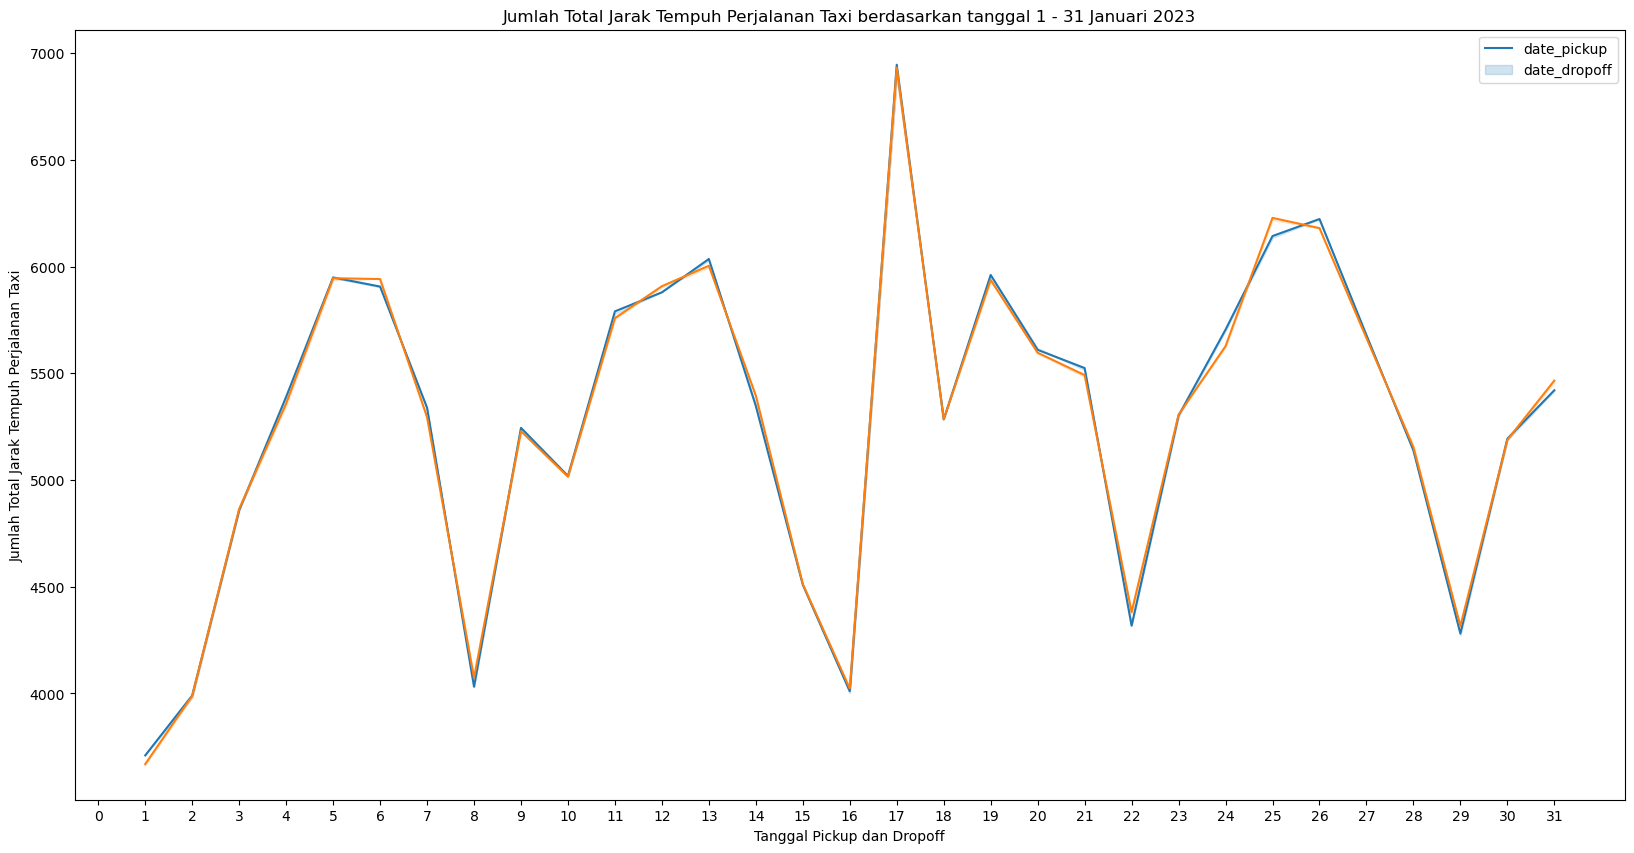

In [53]:
plt.figure(figsize=(20,10))


sns.lineplot(
    data = df_trip,
    x = 'date_pickup',
    y = 'trip_distance',
    estimator = np.sum,
    errorbar= ('ci', 0)
)

sns.lineplot(
    data = df_trip,
    x = 'date_dropoff',
    y = 'trip_distance',
    estimator = np.sum,
    errorbar= ('ci', 0)         
)

plt.xticks(range(0,32))
plt.title('Jumlah Total Jarak Tempuh Perjalanan Taxi berdasarkan tanggal 1 - 31 Januari 2023')
plt.ylabel('Jumlah Total Jarak Tempuh Perjalanan Taxi')
plt.xlabel('Tanggal Pickup dan Dropoff')
plt.legend(['date_pickup', 'date_dropoff'])
plt.show()

**Interpretasi**

- Tanggal 1 - 31 Januari 2023 menunjukkan grafik fluktuatif
- Tanggal 1 - 5 Januari 2023 menunjukkan grafik cenderung meningkat hari kerja 
- Tanggal 6 - 8 Januari 2023 menunjukkan grafik cenderung menurun tidak hari kerja
- Tanggal 9 - 13 Januari 2023 menunjukkan grafik fluktuatif naik hari kerja
- Tanggal 14 - 16 Januari 2023 menunjukkan grafik cenderung menurun hari kerja
- Tanggal 17 - 19 Januari 2023 menunjukkan grafik fluktuatif naik tidak hari kerja
- Tanggal 20 - 22 Januari 2023 menunjukkan grafik cenderung menurun hari kerja
- Tanggal 23 - 25 Januari 2023 menunjukkan grafik fluktuatif naik hari kerja
- Tanggal 26 - 29 Januari 2023 menunjukkan grafik cenderung menurun tidak hari kerja
- Tanggal 30 dan 31 Januari 2023 menunjukkan grafik cenderung meningkat hari kerja
- Hari kerja orang - orang bekerja sering menggunakan taxi untuk pergi ke tempat satu ke tempat lainnya
- Hari tidak kerja orang - orang cenderung kurang beraktivitas dan beristirahat

**Rekomendasi**

- Mencari penumpang dan memberikan promo yang menggunakan Taxi hari sabtu dan minggu 

###  **6.3.2 Total Amount berdasarkan hari**

In [54]:
df_trip3 = df.groupby('day_pickup')[['trip_distance']].sum()
df_trip4 = df.groupby('day_dropoff')[['trip_distance']].sum()
display((df_trip3.head()), (df_trip4.head()))

,trip_distance
day_pickup,
Friday,23232.29
Monday,23742.35
Saturday,21350.65
Sunday,20849.64
Thursday,24013.60


,trip_distance
day_dropoff,
Friday,23208.75
Monday,23737.01
Saturday,21336.84
Sunday,20953.21
Thursday,23972.95


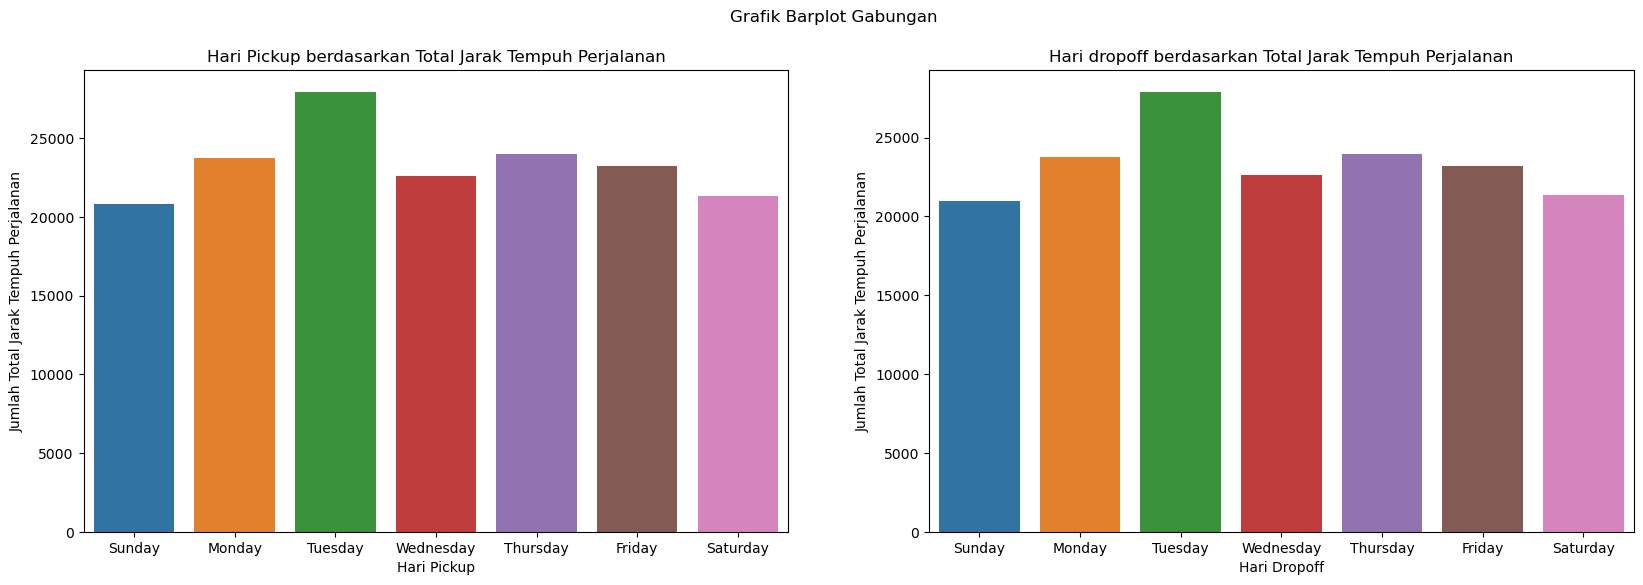

In [55]:
plt.figure(figsize=(20, 6))

plt.suptitle("Grafik Barplot Gabungan", size=12)


plt.subplot(1,2,1) # 1 baris, 3 kolom, pada subplot ke-1
sns.barplot(data=df_trip, x='day_pickup', y='trip_distance', errorbar= ('ci', 0), estimator=np.sum)
plt.title('Hari Pickup berdasarkan Total Jarak Tempuh Perjalanan')
plt.ylabel('Jumlah Total Jarak Tempuh Perjalanan')
plt.xlabel('Hari Pickup')


plt.subplot(1,2,2) # 1 baris, 3 kolom, pada subplot ke-1
sns.barplot(data=df_trip, x='day_dropoff', y='trip_distance', errorbar= ('ci', 0), estimator=np.sum)
plt.title('Hari dropoff berdasarkan Total Jarak Tempuh Perjalanan')
plt.ylabel('Jumlah Total Jarak Tempuh Perjalanan')
plt.xlabel('Hari Dropoff')
plt.show()

**Interpretasi**

- senin sampai jumat grafik cenderung naik jarak tempuh orang-orang bekerja dan beraktivitas sering menggunakan taxi
- sabtu dan minggu rendah karena orang kurang beraktivitas dan beristirahat jarang menggunakan taxi
- hari selasa grafik paling tinggi orang-orang seperti ada event atau acara tertentu pada hari selasa biaya paling tinggi

**Rekomendasi**

- mencari penumpang dan memberikan promo menggunakan taxi di hari sabtu dan minggu

### **6.3.3 Total Amount berdasarkan jam**

In [56]:
df_trip5 = df.groupby('hour_pickup')[['trip_distance']].sum()
df_trip6 = df.groupby('hour_dropoff')[['trip_distance']].sum()
display((df_amount1.head()), (df_amount2.head()))

,total_amount
date_pickup,
1,27296.82
2,28669.94
3,38587.97
4,43206.96
5,45939.22


,total_amount
date_dropoff,
1,26999.76
2,28687.69
3,38608.11
4,43060.53
5,45875.15


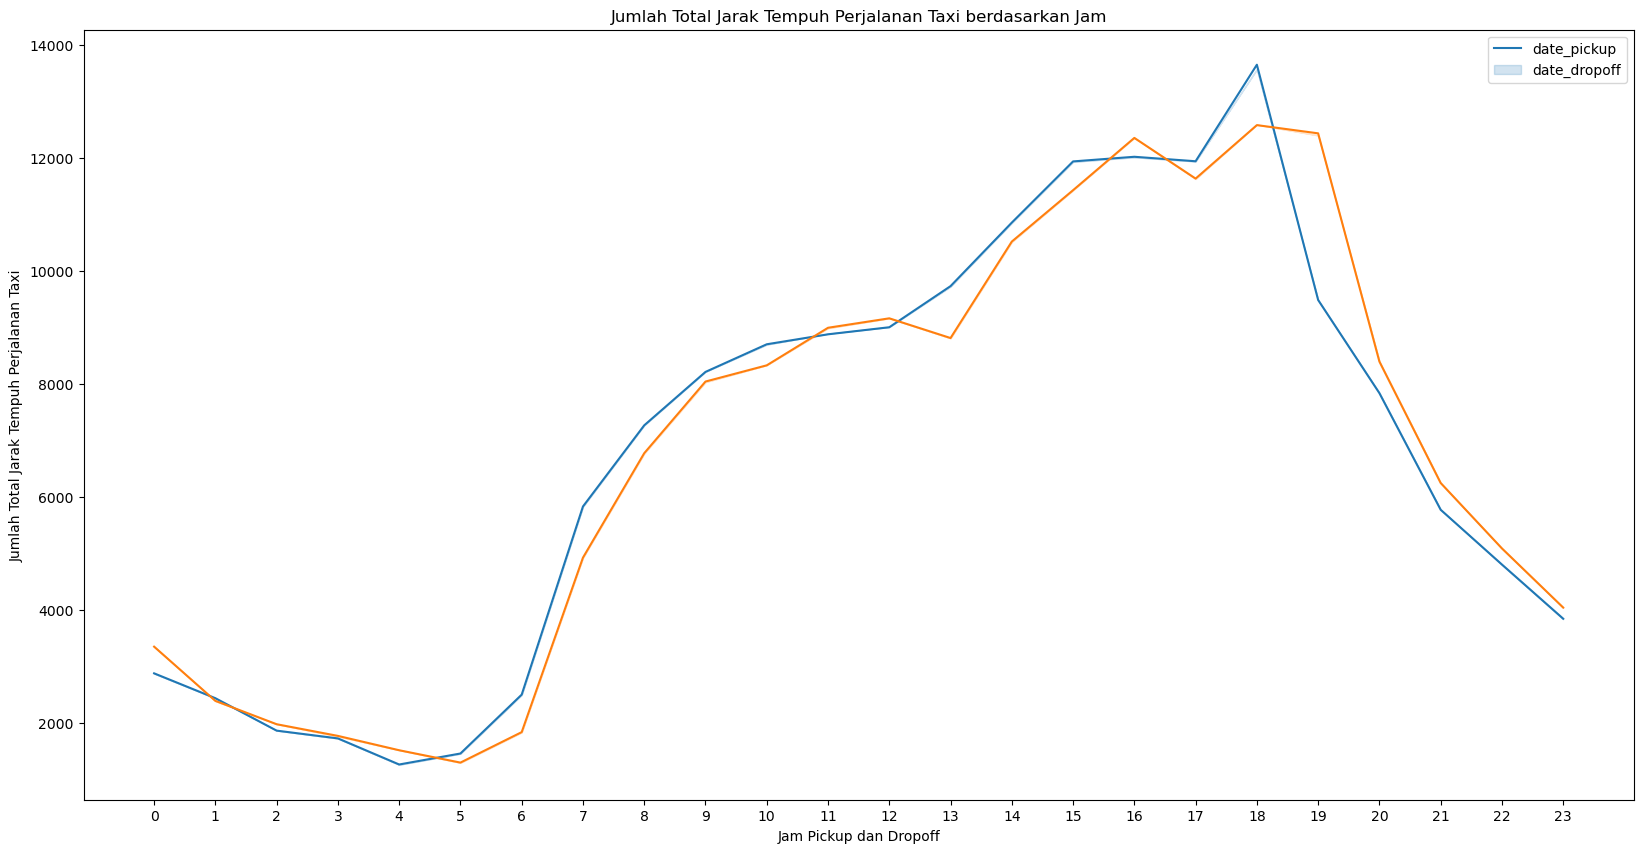

In [57]:
plt.figure(figsize=(20,10))

sns.lineplot(
    data = df_trip,
    x = 'hour_pickup',
    y = 'trip_distance',
    estimator = np.sum,
    errorbar= ('ci', 0)
)
sns.lineplot(
    data = df_trip,
    x = 'hour_dropoff',
    y = 'trip_distance',
    estimator = np.sum,
    errorbar= ('ci', 0)         
)

plt.xticks(range(0,24))
plt.title('Jumlah Total Jarak Tempuh Perjalanan Taxi berdasarkan Jam')
plt.ylabel('Jumlah Total Jarak Tempuh Perjalanan Taxi')
plt.xlabel('Jam Pickup dan Dropoff')
plt.legend(['date_pickup', 'date_dropoff'])
plt.show()

**Interpretasi**

- Jam 12 Malam - 11 Malam  menunjukkan grafik fluktuatif jumlah penumpang taxi
- Jam 12 Malam - 5 Pagi menunjukkan grafik cenderung menurun 
- Jam 6 Pagi - 12 Siang menunjukkan grafik cenderung naik 
- Jam 1 Siang - 4 Sore menunjukkan grafik cenderung naik 
- Jam 5 Sore - 6 Sore Menunjukkan grafik cenderung naik
- Jam 7 Malam - 11 Malam Menunjukkan grafik cenderung turun
- pada jam 12 malam sampai jam 5 pagi menunjukkan cenderung grafik menurun kurang ada aktivitas dan orang-orang beristirahat untuk di jam 12 malam sampai jam 5 pagi
- pada jam 1 pada jam 1 siang perlu ditingkatkan mencari penumpang setelah jam istirahat kantor selesai dan kembali ke kantor
- pada jam 6 pagi sampai jam 7 malam menunujukkan signifikan naik orang-orang beraktivitas seperti bekerja, wisata, dan lainnya
- pada jam 8 - 11 malam menunujukkan cenderung menurun karena orang-orang mulai istrahat

**Rekomendasi**
- pada jam 1 siang perlu ditingkatkan mencari penumpang setelah jam istirahat kantor selesai dan kembali ke kantor

## **6.4 Passenger Count**

Data Passenger Count yang dianalisa yaitu Total Amount berdasarkan tanggal, hari, dan jam

In [58]:
df_pass = df[['day_pickup', 'day_dropoff', 'date_pickup', 'date_dropoff','hour_pickup', 'hour_dropoff', 'passenger_count']]
df_pass.head()

,day_pickup,day_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,passenger_count
0,Sunday,Sunday,1,1,0,0,1.0
1,Sunday,Sunday,1,1,0,0,1.0
2,Sunday,Sunday,1,1,0,0,1.0
3,Sunday,Sunday,1,1,0,0,1.0
4,Sunday,Sunday,1,1,0,1,1.0


### **6.4.1 Passenger Count berdasarkan Tanggal**

In [59]:
df_pass1 = df.groupby('date_pickup')[['passenger_count']].sum()
df_pass2 = df.groupby('date_dropoff')[['passenger_count']].sum()
display((df_pass1.head()), (df_pass2.head()))

,passenger_count
date_pickup,
1,1714.0
2,1848.0
3,2603.0
4,2729.0
5,2909.0


,passenger_count
date_dropoff,
1,1692.0
2,1853.0
3,2608.0
4,2727.0
5,2900.0


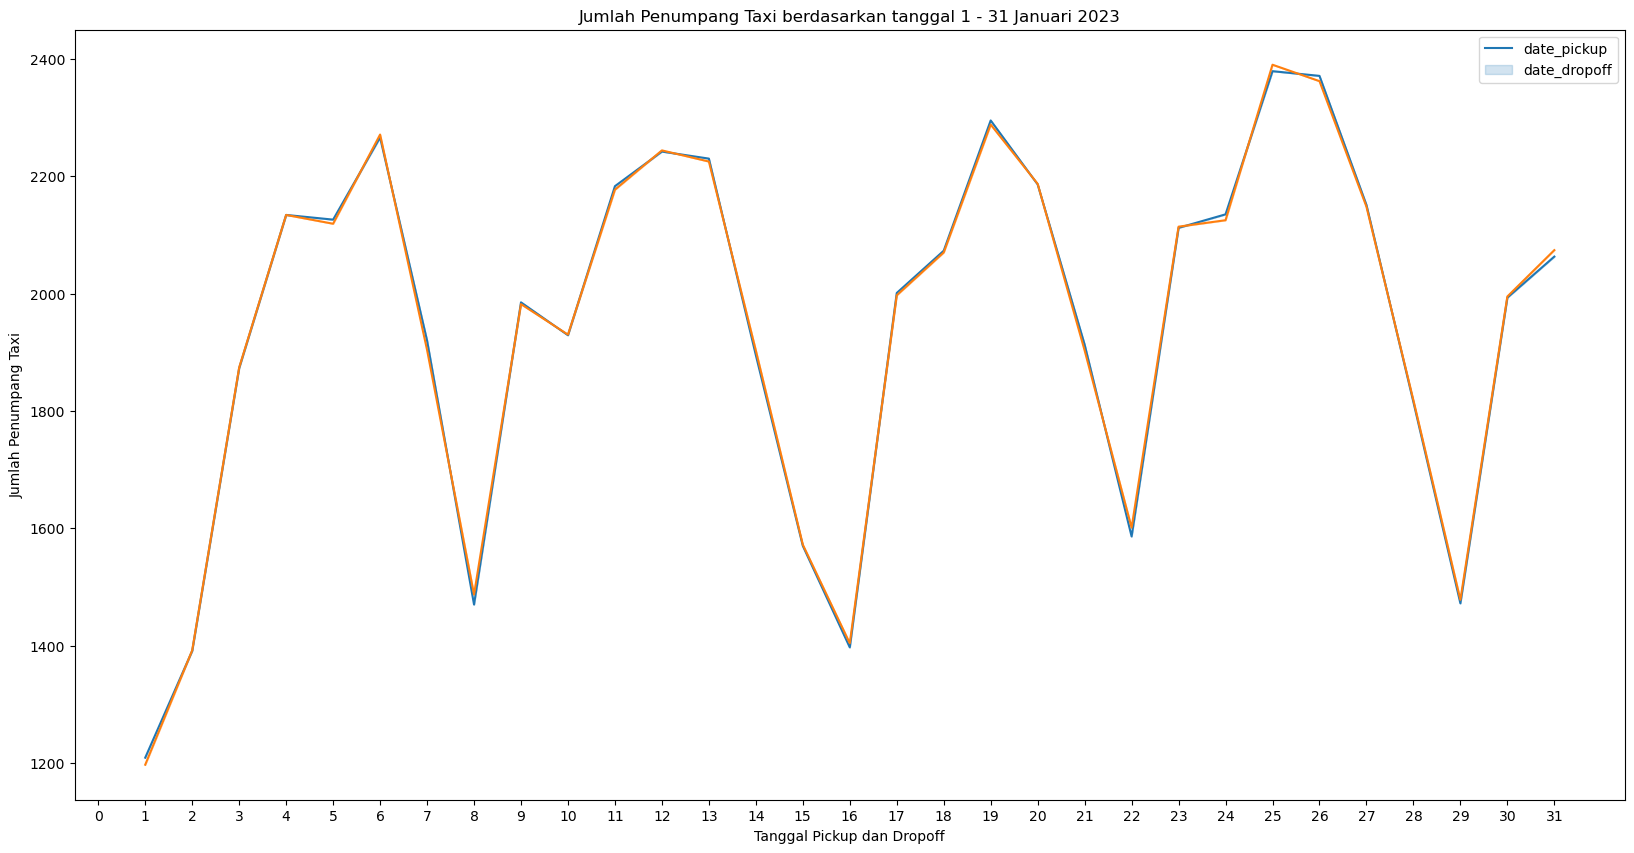

In [60]:
plt.figure(figsize=(20,10))


sns.lineplot(
    data = df_pass,
    x = 'date_pickup',
    y = 'passenger_count',
    estimator = len,
    errorbar= ('ci', 0)
)

sns.lineplot(
    data = df_pass,
    x = 'date_dropoff',
    y = 'passenger_count',
    estimator = len,
    errorbar= ('ci', 0)         
)

plt.xticks(range(0,32))
plt.title('Jumlah Penumpang Taxi berdasarkan tanggal 1 - 31 Januari 2023')
plt.ylabel('Jumlah Penumpang Taxi')
plt.xlabel('Tanggal Pickup dan Dropoff')
plt.legend(['date_pickup', 'date_dropoff'])
plt.show()

**Interpretasi**

- Tanggal 1 - 31 Januari 2023 menunjukkan grafik fluktuatif jumlah penumpang taxi
- Tanggal 1 - 5 Januari 2023 menunjukkan grafik cenderung meningkat hari kerja 
- Tanggal 6 - 8 Januari 2023 menunjukkan grafik cenderung menurun tidak hari kerja
- Tanggal 9 - 13 Januari 2023 menunjukkan grafik fluktuatif naik hari kerja
- Tanggal 14 - 16 Januari 2023 menunjukkan grafik cenderung menurun hari kerja
- Tanggal 17 - 19 Januari 2023 menunjukkan grafik fluktuatif naik tidak hari kerja
- Tanggal 20 - 22 Januari 2023 menunjukkan grafik cenderung menurun hari kerja
- Tanggal 23 - 25 Januari 2023 menunjukkan grafik fluktuatif naik hari kerja
- Tanggal 26 - 29 Januari 2023 menunjukkan grafik cenderung menurun tidak hari kerja
- Tanggal 30 dan 31 Januari 2023 menunjukkan grafik cenderung meningkat hari kerja
- Hari kerja orang - orang bekerja sering menggunakan taxi untuk pergi ke tempat satu ke tempat lainnya
- Hari tidak kerja orang - orang cenderung kurang beraktivitas dan beristirahat

**Rekomendasi**

- Mencari penumpang dan memberikan promo yang menggunakan Taxi hari sabtu dan minggu  

### **6.4.2 Passenger Count berdasarkan Hari**

In [61]:
df_pass3 = df.groupby('day_pickup')[['passenger_count']].sum()
df_pass4 = df.groupby('day_dropoff')[['passenger_count']].sum()
display((df_pass3.head()), (df_pass4.head()))

,passenger_count
day_pickup,
Friday,12018.0
Monday,11699.0
Saturday,9985.0
Sunday,9954.0
Thursday,11977.0


,passenger_count
day_dropoff,
Friday,12017.0
Monday,11707.0
Saturday,9958.0
Sunday,9993.0
Thursday,11960.0


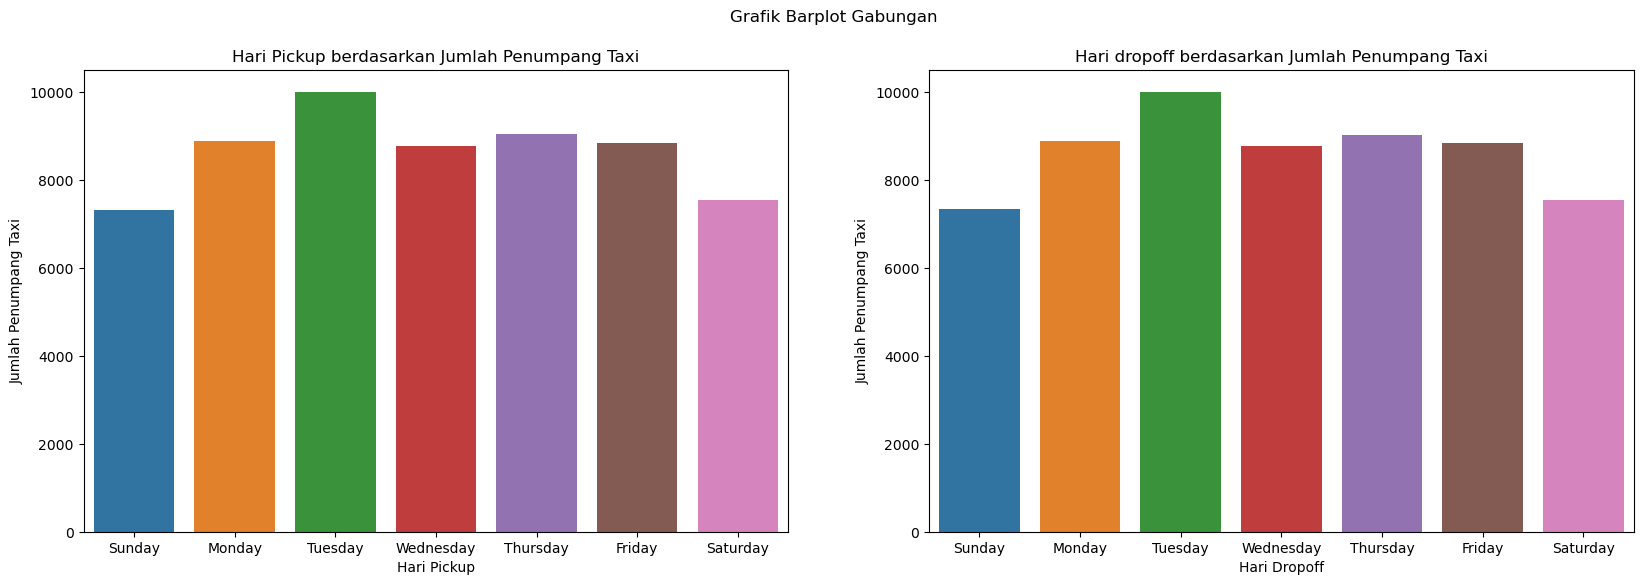

In [62]:
plt.figure(figsize=(20, 6))

plt.suptitle("Grafik Barplot Gabungan", size=12)


plt.subplot(1,2,1) # 1 baris, 2 kolom, pada subplot ke-1
sns.barplot(data=df_pass, x='day_pickup', y='passenger_count', errorbar= ('ci', 0), estimator=len)
plt.title('Hari Pickup berdasarkan Jumlah Penumpang Taxi')
plt.ylabel('Jumlah Penumpang Taxi')
plt.xlabel('Hari Pickup')


plt.subplot(1,2,2) # 1 baris, 2 kolom, pada subplot ke-2
sns.barplot(data=df_pass, x='day_dropoff', y='passenger_count', errorbar= ('ci', 0), estimator=len)
plt.title('Hari dropoff berdasarkan Jumlah Penumpang Taxi')
plt.ylabel('Jumlah Penumpang Taxi')
plt.xlabel('Hari Dropoff')
plt.show()

**Interpretasi**

- senin sampai jumat grafik cenderung naik jumlah penumpang orang-orang bekerja dan beraktivitas sering menggunakan taxi
- sabtu dan minggu grafik cenderung kurang beraktivitas dan beristirahat jarang menggunakan taxi
- hari selasa grafik paling tinggi orang-orang hari sibuk bekerja menggunakan taxi

**Rekomendasi**

- mencari penumpang dan memberikan promo menggunakan taxi di hari sabtu dan minggu

### **6.4.3 Passenger Count berdasarkan Jam**

In [63]:
df_pass5 = df.groupby('hour_pickup')[['passenger_count']].sum()
df_pass6 = df.groupby('hour_dropoff')[['passenger_count']].sum()
display((df_pass5.head()), (df_pass6.head()))

,passenger_count
hour_pickup,
0,1321.0
1,1094.0
2,802.0
3,725.0
4,514.0


,passenger_count
hour_dropoff,
0,1493.0
1,1102.0
2,834.0
3,764.0
4,570.0


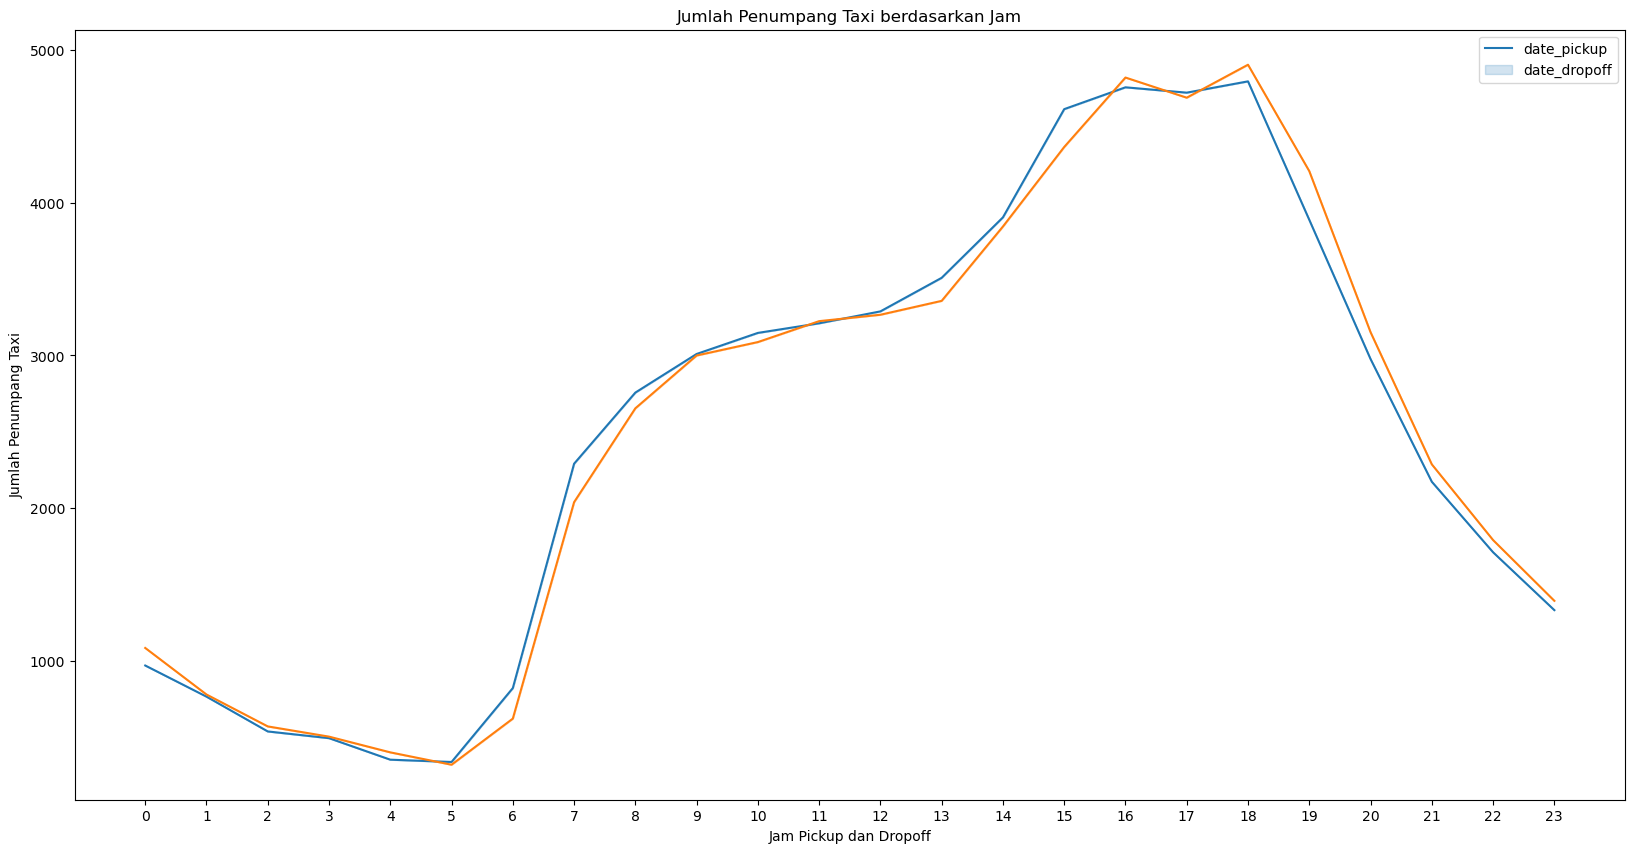

In [64]:
plt.figure(figsize=(20,10))

sns.lineplot(
    data = df_pass,
    x = 'hour_pickup',
    y = 'passenger_count',
    estimator = len,
    errorbar= ('ci', 0)
)
sns.lineplot(
    data = df_pass,
    x = 'hour_dropoff',
    y = 'passenger_count',
    estimator = len,
    errorbar= ('ci', 0)         
)

plt.xticks(range(0,24))
plt.title('Jumlah Penumpang Taxi berdasarkan Jam')
plt.ylabel('Jumlah Penumpang Taxi')
plt.xlabel('Jam Pickup dan Dropoff')
plt.legend(['date_pickup', 'date_dropoff'])
plt.show()

**Interpretasi**
- Jam 12 Malam - 11 Malam  menunjukkan grafik fluktuatif jumlah penumpang taxi
- Jam 12 Malam - 5 Pagi menunjukkan grafik cenderung menurun 
- Jam 6 Pagi - 12 Siang menunjukkan grafik cenderung naik 
- Jam 1 Siang - 4 Sore menunjukkan grafik cenderung naik 
- Jam 5 Sore - 6 Sore Menunjukkan grafik cenderung naik
- Jam 7 Malam - 11 Malam Menunjukkan grafik cenderung turun
- pada jam 12malam sampai jam 5 pagi menunjukkan cenderung grafik menurun kurang ada aktivitas dan orang-orang beristirahat untuk di jam 12 malam sampai jam 5 pagi
- pada jam 1 siang sedikit menurun grafik karena sudah kembali orang istrahat dari jam kerja 
- pada jam 6 pagi sampai jam 7 malam menunujukkan signifikan naik orang-orang beraktivitas seperti bekerja, wisata, dan lainnya
- pada jam 8 - 11 malam menunujukkan cenderung menurun karena orang-orang mulai istrahat

**Rekomendasi**
- pada jam 1 siang perlu ditingkatkan mencari penumpang setelah jam istirahat kantor selesai dan kembali ke kantor

## **6.5 trip Type**

Data Trip type yang dianalisa yaitu Jumlah Penumpang

In [65]:
df_type = df[['passenger_count' , 'trip_type']]
df_type

,passenger_count,trip_type
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
60360,1.0,2.0
60361,1.0,1.0
60362,1.0,1.0
60363,1.0,1.0


### **6.5.1 Trip tipe berdasarkan Jumlah Passenger Count**

In [66]:
df.groupby('trip_type')[['passenger_count']].count()

,passenger_count
trip_type,
1.0,59515
2.0,850


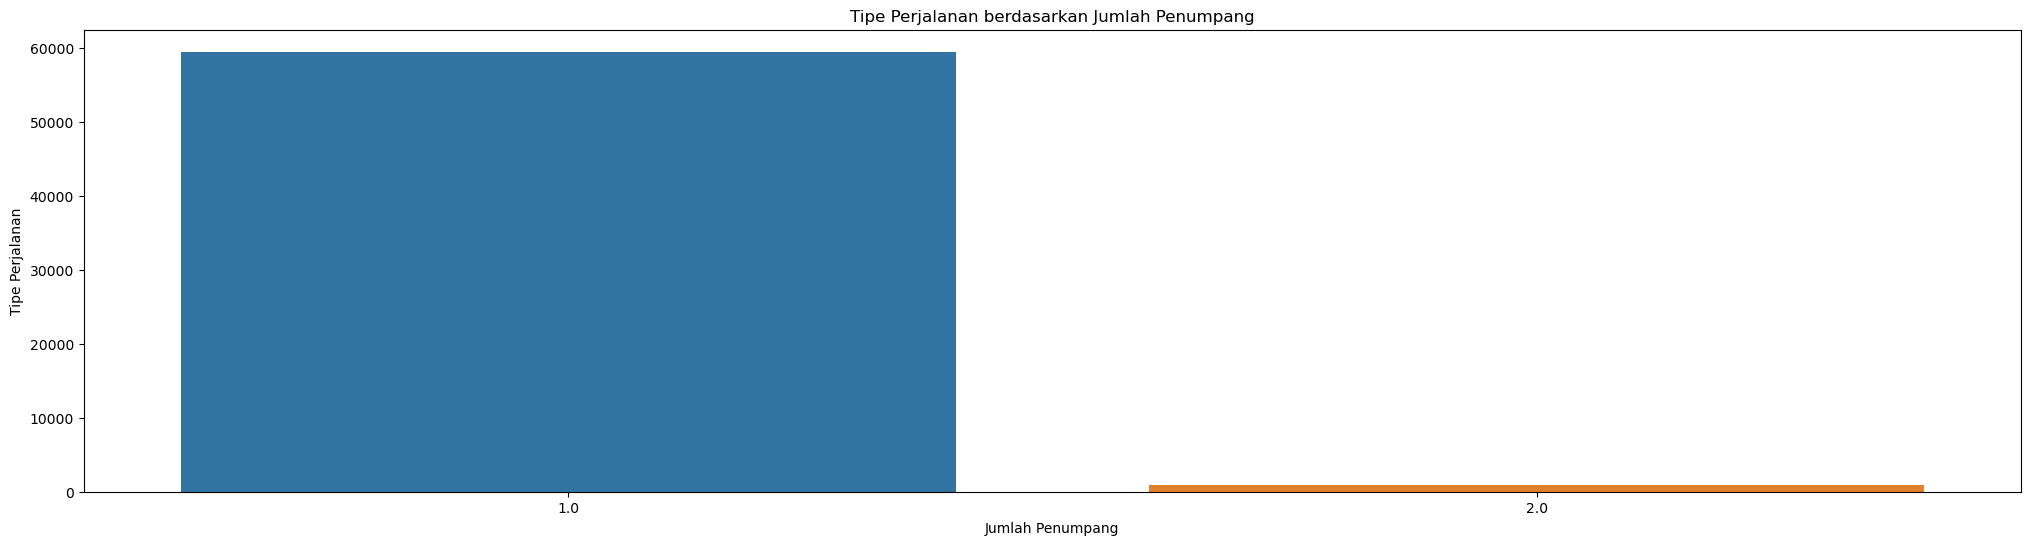

In [67]:
plt.figure(figsize=(25, 6))
sns.barplot(data=df_type, x='trip_type', y='passenger_count', errorbar= ('ci', 0), estimator=len)
plt.title('Tipe Perjalanan berdasarkan Jumlah Penumpang')
plt.ylabel('Tipe Perjalanan')
plt.xlabel('Jumlah Penumpang')
plt.show()

**Interpretasi**

- data yang paling rendah grafik 2.0 orang-orang memilih memesan taxi dengan tarif yang dapat dinegosiasikan
- data yang paling tinggi grafik 1.0 yaitu orang-orang memilih memberhentikan taxi sedang jalan yang tarif tidak dapat dinegosiasikan
- orang-orang bekerja sering menggunakan perjalanan tipe memberhentikan taxi yang kosong penumpang di jalan sesuai dengan harga argometer tidak dapat ditawar
- orang-orang bekerja jarang menggunakan perjalan tipe memesan taxi melalui aplikasi dan telepon harga dapat ditawar

**Rekomendasi**
- Memesan taxi dengan tarif dengan tarif yang dapat dinegosiasikan, tarif taxi dapat lebih murah daripada tidak dapat dinegosiasikan sesuai dengan tarif argometer

# **7. Kesimpulan**

Permasalahan yang terjadi **perusahaan ingin mengetahui total jumlah pendapatan, jumlah penumpang dari perjalanan taxi dan tipe perjalanan seperti apa disukai penumpang di New york**

**Kesimpulan Data Understanding:**

- Data dari NYC TLC trip record terdiri dari 68211 baris dan 20 kolom
- Tabel 'lpep_pickup_datetime' 'lpep_dropoff_datetime' tipe datanya yang awalnya objek diganti dengan datetime
- Data set dari NYC TLC trip record tidak ada data yang duplikat(data ganda) dan Data yang berisi nan kolom data yaitu 'store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'ehail_fee' dan 'congestion_surcharge'


**Kesimpulan Data Cleaning:**

- data dari NYC TLC trip record terdiri dari 60365 baris dan 29 kolom, sudah tidak ada missing value
- Ada penambahan 10 kolom digunakan untuk mempermudah analisa data'year_pickup', 'month_pickup', 'date_pickup', 'day_pickup', 'hour_pickup',
'year_dropoff', 'month_dropoff', 'date_dropoff', 'day_dropoff', 'hour_dropoff'
- Data tahun 2009 dan 2022 dihilangkan karena salah input data
- Data bulan februari dihilangkan karena salah input data
- Data 0 di 'trip_distance' perlu dihilangkan karena tidak ada perjalanan, sehingga dihilangkan
- Data 0 di 'passenger_count' perlu dihilangkan karena tidak ada penumpang, sehingga dihilangkan
- Terdiri dari 8 kolom data numerikal yang divisualisasikan dalam bentuk grafik histogram dan Boxplot
- Data NYC dari data numerikal p-value <0.05 maka data distribusi tidak normal

**Kesimpulan Data Analysis:**

**Korelasi**:
- Korelasi nilai positif kuat sebesar 0.94 untuk total amount dengan fare amount, nilai total amount naik maka nilai fare amount naik
- Korelasi nilai positif cukup kuat sebesar 0.48 untuk yang cukup kuat total amount dan tip amount, nilai total amount naik maka nilai tip amount cukup naik 
- Korelasi yang paling lemah kuat sebesar -0.93 untuk vendorID dan mta_tax, nilai vendor ID turun maka nilai mta_tax naik

**Total Amount, passenger_count, dan trip_distance**:

- Tanggal 1 - 31 Januari 2023 menunjukkan grafik fluktuatif 
- Hari kerja orang - orang bekerja sering menggunakan taxi untuk pergi ke tempat satu ke tempat lainnya
- Hari tidak kerja orang - orang cenderung kurang beraktivitas dan beristirahat
- senin sampai jumat grafik cenderung meningkat orang beraktivitas seperti bekerja, wisata, dan lain-lain sering menggunakan taxi
- sabtu dan minggu grafik turun orang kurang beraktivitas dan istirahat jarang menggunakan taxi
- Jam 12 Malam - 11 Malam  menunjukkan grafik fluktuatif
- pada jam 12 malam sampai jam 5 pagi menunjukkan cenderung grafik menurun pendapatan taxi kurang ada aktivitas dan orang-orang beristirahat untuk di jam 12 malam sampai jam 5 pagi
- pada jam 1 siang sedikit menurun grafik karena sudah kembali orang istrahat dari jam kerja 
- pada jam 6 pagi sampai jam 7 malam menunujukkan signifikan naik pendapatan taxi karena orang-orang beraktivitas seperti bekerja, wisata, dan lainnya
- pada jam 8 - 11 malam menunujukkan cenderung menurun pendapatan taxi karena orang-orang mulai istrahat

**Trip_type**:
- Data yang paling rendah grafik 2.0 orang-orang memilih memesan taxi dengan tarif yang dapat dinegosiasikan
- Data yang paling tinggi grafik 1.0 yaitu orang-orang memilih memberhentikan taxi sedang jalan yang tarif tidak dapat dinegosiasikan
- Orang-orang bekerja sering menggunakan perjalanan tipe memberhentikan taxi yang kosong penumpang di jalan sesuai dengan harga argometer tidak dapat ditawar
- Orang-orang bekerja jarang menggunakan perjalan tipe memesan taxi melalui aplikasi dan telepon harga dapat ditawar

# **8. Rekomendasi**

**Rekomendasi Data Understanding:**

- Penginputan tabel 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime' diinput dalam tipe data tanggal dan waktu bukan bukan tipe data Object

**Rekomendasi Data Cleaning**:

- data 0 di 'trip_distance' dihilangkan karena tidak dibutuhkan
- data 0 di 'passenger_count' dihilangkan karena tidak dibutuhkan

**Rekomendasi Data Analysis**:

- Mencari penumpang dan memberikan promo yang menggunakan Taxi hari sabtu dan minggu
- pada jam 1 siang perlu ditingkatkan mencari penumpang setelah jam istirahat kantor selesai dan kembali ke kantor
- Memesan taxi dengan tarif dengan tarif yang dapat dinegosiasikan, tarif taxi dapat lebih murah daripada tidak dapat dinegosiasikan sesuai dengan tarif argometer